# Problem Statement : 

## Business problem overview
 

### In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

### For many incumbent operators, retaining high profitable customers is the number one business goal.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Reading and understanding the data

In [2]:
# Reading the dataset
tele = pd.read_csv('telecom_churn_data.csv')
tele.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [3]:
tele.shape

(99999, 226)

In [4]:
tele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [5]:
tele.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


## Checking and Handling Missing Values. 

### Then Dropping columns with over 30% of the values missing. 

In [6]:
tele.isnull().sum()

mobile_number        0
circle_id            0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 226, dtype: int64

In [7]:
100*tele.isnull().mean()

mobile_number     0.00000
circle_id         0.00000
loc_og_t2o_mou    1.01801
std_og_t2o_mou    1.01801
loc_ic_t2o_mou    1.01801
                   ...   
aon               0.00000
aug_vbc_3g        0.00000
jul_vbc_3g        0.00000
jun_vbc_3g        0.00000
sep_vbc_3g        0.00000
Length: 226, dtype: float64

In [8]:
cutoff=30
cols_to_drop=list(tele.columns[100*tele.isnull().mean()>cutoff])
cols_to_drop

['date_of_last_rech_data_6',
 'date_of_last_rech_data_7',
 'date_of_last_rech_data_8',
 'date_of_last_rech_data_9',
 'total_rech_data_6',
 'total_rech_data_7',
 'total_rech_data_8',
 'total_rech_data_9',
 'max_rech_data_6',
 'max_rech_data_7',
 'max_rech_data_8',
 'max_rech_data_9',
 'count_rech_2g_6',
 'count_rech_2g_7',
 'count_rech_2g_8',
 'count_rech_2g_9',
 'count_rech_3g_6',
 'count_rech_3g_7',
 'count_rech_3g_8',
 'count_rech_3g_9',
 'av_rech_amt_data_6',
 'av_rech_amt_data_7',
 'av_rech_amt_data_8',
 'av_rech_amt_data_9',
 'arpu_3g_6',
 'arpu_3g_7',
 'arpu_3g_8',
 'arpu_3g_9',
 'arpu_2g_6',
 'arpu_2g_7',
 'arpu_2g_8',
 'arpu_2g_9',
 'night_pck_user_6',
 'night_pck_user_7',
 'night_pck_user_8',
 'night_pck_user_9',
 'fb_user_6',
 'fb_user_7',
 'fb_user_8',
 'fb_user_9']

In [9]:
tele=tele.drop(cols_to_drop,axis=1)

In [10]:
tele.shape

(99999, 186)

In [11]:
tele

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,0,0,0,0,968,30.40,0.00,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,0,0,0,0,1006,0.00,0.00,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,0,0,0,0,1103,0.00,0.00,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,0,0,0,0,2491,0.00,0.00,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0,0,0,0,1526,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99994,7001548952,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,18.471,...,0,0,0,0,0,3199,0.00,0.00,0.00,0.00
99995,7000607688,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,112.201,...,0,0,0,0,0,2052,0.00,0.00,0.00,0.00
99996,7000087541,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,229.187,...,0,0,0,0,0,185,0.00,0.00,0.00,0.00
99997,7000498689,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,322.991,...,4,1,0,0,0,478,1445.74,1151.03,1173.18,0.00


### We are now going to drop the Date columns since we are not working with time series data as we are trying to determine churn rate of customers for which we will be applying a predictive analysis using Logistic Regression. 

### Based on this we are dropping the date columns. 

In [12]:
date_cols = [p for p in tele.columns.to_list() if 'date' in p]
print(date_cols)

['last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'last_date_of_month_9', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_9']


In [13]:
tele=tele.drop(date_cols,axis=1)

### We are also dropping 'Circle ID' as it is a part of the dataset that is not affecting the data analysis in any way. 

In [14]:
 tele = tele.drop('circle_id', axis=1)

In [15]:
tele.shape

(99999, 177)

In [16]:
tele.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,0.0,0.0,0.0,197.385,214.816,213.803,21.100,NaN,NaN,...,0,0,0,0,0,968,30.4,0.0,101.20,3.58
1,7001865778,0.0,0.0,0.0,34.047,355.074,268.321,86.285,24.11,78.68,...,0,0,0,0,0,1006,0.0,0.0,0.00,0.00
2,7001625959,0.0,0.0,0.0,167.690,189.058,210.226,290.714,11.54,55.24,...,0,0,0,0,0,1103,0.0,0.0,4.17,0.00
3,7001204172,0.0,0.0,0.0,221.338,251.102,508.054,389.500,99.91,54.39,...,0,0,0,0,0,2491,0.0,0.0,0.00,0.00
4,7000142493,0.0,0.0,0.0,261.636,309.876,238.174,163.426,50.31,149.44,...,0,0,0,0,0,1526,0.0,0.0,0.00,0.00


##### Checking for null values once more. 

In [17]:
tele.isnull().sum()

mobile_number        0
loc_og_t2o_mou    1018
std_og_t2o_mou    1018
loc_ic_t2o_mou    1018
arpu_6               0
                  ... 
aon                  0
aug_vbc_3g           0
jul_vbc_3g           0
jun_vbc_3g           0
sep_vbc_3g           0
Length: 177, dtype: int64

## Filtering High Value Customers - Meaning cutomers who are in the top 20% of the users and who generate 80% of the revenue. 

##### Now we will try to create a column to figure out which customers are of the most value based on the Mean of their recharge amount. 

In [18]:
tele['avrg_rechrg_amt_6_7'] = (tele['total_rech_amt_6'] + tele['total_rech_amt_7'])/2

In [19]:
Y = tele['avrg_rechrg_amt_6_7'].quantile(0.7)
Y

368.5

In [20]:
tele = tele[tele['avrg_rechrg_amt_6_7'] >= Y]
tele.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [21]:
tele.shape

(30011, 178)

### Filtering High value customers upto the 70th Percentile, as mentioned in the problem we should get around 30K rows of users. 

In [22]:
tele.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
count,3.001100e+04,29897.0,29897.0,29897.0,30011.000000,30011.000000,30011.000000,30011.000000,29695.000000,29708.000000,...,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000,30011.000000
mean,7.001223e+09,0.0,0.0,0.0,587.284404,589.135427,534.857433,488.656197,299.184718,307.447285,...,0.137916,0.150212,0.140415,0.136550,1264.064776,129.439626,135.127102,121.360548,6.562685,696.664356
std,6.846405e+05,0.0,0.0,0.0,442.722413,462.897814,492.259586,496.486834,462.202367,483.244786,...,0.875528,0.969286,0.974727,0.936441,975.263117,390.478591,408.024394,389.726031,48.638658,488.782088
min,7.000000e+09,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000,368.500000
25%,7.000641e+09,0.0,0.0,0.0,364.161000,365.004500,289.609500,239.184000,42.960000,42.660000,...,0.000000,0.000000,0.000000,0.000000,480.000000,0.000000,0.000000,0.000000,0.000000,450.000000
50%,7.001232e+09,0.0,0.0,0.0,495.682000,493.561000,452.091000,413.152000,128.330000,127.950000,...,0.000000,0.000000,0.000000,0.000000,914.000000,0.000000,0.000000,0.000000,0.000000,568.500000
75%,7.001814e+09,0.0,0.0,0.0,703.922000,700.788000,671.150000,635.553000,357.120000,364.567500,...,0.000000,0.000000,0.000000,0.000000,1924.000000,1.600000,1.990000,0.000000,0.000000,795.500000
max,7.002411e+09,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,29.000000,35.000000,41.000000,49.000000,4321.000000,12916.220000,9165.600000,11166.210000,2618.570000,37762.500000


#### Now we will try to check for the missing number of rows where more than 50% of the values are missing, if so then try to rectify them or drop them as need be. 

In [23]:
tele_missing_rows_50 = tele[(tele.isnull().sum(axis=1)) > (len(tele.columns)//2)]
tele_missing_rows_50.shape

(114, 178)

In [24]:
tele = tele.drop(tele_missing_rows_50.index)
tele.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.000,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0


In [25]:
tele.shape

(29897, 178)

#### Checking for missing values in the columns once more. 

In [26]:
tele_missing_columns = (round(((tele.isnull().sum()/len(tele.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tele_missing_columns

,null
loc_ic_mou_9,5.32
og_others_9,5.32
loc_og_t2t_mou_9,5.32
loc_ic_t2t_mou_9,5.32
loc_og_t2m_mou_9,5.32
...,...
max_rech_amt_7,0.00
max_rech_amt_8,0.00
max_rech_amt_9,0.00
last_day_rch_amt_6,0.00


### As we can see that Minutes of Usage - Voice calls in the month of September(9) is having missing values. 

### Let's check for all the missing vlaues that are present together for MOU. 

In [27]:
print(((tele_missing_columns[tele_missing_columns['null'] == 5.32]).index).to_list())

['loc_ic_mou_9', 'og_others_9', 'loc_og_t2t_mou_9', 'loc_ic_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'std_ic_t2m_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'roam_og_mou_9', 'std_ic_t2o_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'spl_og_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'std_ic_t2t_mou_9', 'std_ic_mou_9', 'onnet_mou_9', 'spl_ic_mou_9', 'ic_others_9', 'isd_ic_mou_9', 'loc_ic_t2f_mou_9', 'offnet_mou_9', 'loc_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'roam_ic_mou_9']


In [28]:
tele_null_mou_9 = tele[(tele['loc_og_t2m_mou_9'].isnull()) & (tele['loc_ic_t2f_mou_9'].isnull()) & (tele['roam_og_mou_9'].isnull()) & (tele['std_ic_t2m_mou_9'].isnull()) &
  (tele['loc_og_t2t_mou_9'].isnull()) & (tele['std_ic_t2t_mou_9'].isnull()) & (tele['loc_og_t2f_mou_9'].isnull()) & (tele['loc_ic_mou_9'].isnull()) &
  (tele['loc_og_t2c_mou_9'].isnull()) & (tele['loc_og_mou_9'].isnull()) & (tele['std_og_t2t_mou_9'].isnull()) & (tele['roam_ic_mou_9'].isnull()) &
  (tele['loc_ic_t2m_mou_9'].isnull()) & (tele['std_og_t2m_mou_9'].isnull()) & (tele['loc_ic_t2t_mou_9'].isnull()) & (tele['std_og_t2f_mou_9'].isnull()) & 
  (tele['std_og_t2c_mou_9'].isnull()) & (tele['og_others_9'].isnull()) & (tele['std_og_mou_9'].isnull()) & (tele['spl_og_mou_9'].isnull()) & 
  (tele['std_ic_t2f_mou_9'].isnull()) & (tele['isd_og_mou_9'].isnull()) & (tele['std_ic_mou_9'].isnull()) & (tele['offnet_mou_9'].isnull()) & 
  (tele['isd_ic_mou_9'].isnull()) & (tele['ic_others_9'].isnull()) & (tele['std_ic_t2o_mou_9'].isnull()) & (tele['onnet_mou_9'].isnull()) & 
  (tele['spl_ic_mou_9'].isnull())]

tele_null_mou_9.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
7,7000701601,0.0,0.0,0.0,1069.180,1349.850,3171.480,500.0,57.84,54.68,...,0,0,0,0,802,57.74,19.38,18.74,0.0,1185.0
97,7000589828,0.0,0.0,0.0,374.863,294.023,183.043,0.0,433.59,415.66,...,0,0,0,0,502,0.00,0.00,0.00,0.0,380.0
111,7001300706,0.0,0.0,0.0,596.301,146.073,0.000,0.0,55.19,3.26,...,1,0,0,0,332,0.00,0.00,0.00,0.0,441.0
143,7000106299,0.0,0.0,0.0,695.609,39.981,0.000,0.0,1325.91,28.61,...,0,0,0,0,264,0.00,0.00,0.00,0.0,418.0
188,7000340381,0.0,0.0,0.0,734.641,183.668,0.000,0.0,4.38,0.98,...,0,0,0,0,244,0.00,831.48,1223.04,0.0,492.0


In [29]:
tele_null_mou_9.shape

(1590, 178)

In [30]:
tele = tele.drop(tele_null_mou_9.index)

In [31]:
tele.shape

(28307, 178)

In [32]:
tele_missing_columns = (round(((tele.isnull().sum()/len(tele.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tele_missing_columns

,null
isd_og_mou_8,0.55
roam_ic_mou_8,0.55
loc_og_mou_8,0.55
std_ic_t2o_mou_8,0.55
roam_og_mou_8,0.55
...,...
total_og_mou_9,0.00
total_og_mou_8,0.00
total_og_mou_7,0.00
total_og_mou_6,0.00


#### Again we will check for the missing values of Minutes of Usage - Month of August_8 as we can see that there are missing values present for this month. 

In [33]:
print(((tele_missing_columns[tele_missing_columns['null'] == 0.55]).index))

Index(['isd_og_mou_8', 'roam_ic_mou_8', 'loc_og_mou_8', 'std_ic_t2o_mou_8',
       'roam_og_mou_8', 'loc_ic_t2f_mou_8', 'loc_og_t2t_mou_8',
       'std_ic_t2f_mou_8', 'std_og_t2m_mou_8', 'loc_og_t2m_mou_8',
       'std_og_t2t_mou_8', 'std_ic_t2m_mou_8', 'loc_og_t2f_mou_8',
       'spl_og_mou_8', 'loc_ic_mou_8', 'loc_og_t2c_mou_8', 'std_ic_t2t_mou_8',
       'loc_ic_t2m_mou_8', 'std_og_t2f_mou_8', 'spl_ic_mou_8', 'std_ic_mou_8',
       'offnet_mou_8', 'ic_others_8', 'og_others_8', 'loc_ic_t2t_mou_8',
       'onnet_mou_8', 'isd_ic_mou_8', 'std_og_t2c_mou_8', 'std_og_mou_8'],
      dtype='object')


In [34]:
tele_null_mou_8 = tele[(tele['loc_og_t2m_mou_8'].isnull()) & (tele['loc_ic_t2f_mou_8'].isnull()) & (tele['roam_og_mou_8'].isnull()) & (tele['std_ic_t2m_mou_8'].isnull()) &
  (tele['loc_og_t2t_mou_8'].isnull()) & (tele['std_ic_t2t_mou_8'].isnull()) & (tele['loc_og_t2f_mou_8'].isnull()) & (tele['loc_ic_mou_8'].isnull()) &
  (tele['loc_og_t2c_mou_8'].isnull()) & (tele['loc_og_mou_8'].isnull()) & (tele['std_og_t2t_mou_8'].isnull()) & (tele['roam_ic_mou_8'].isnull()) &
  (tele['loc_ic_t2m_mou_8'].isnull()) & (tele['std_og_t2m_mou_8'].isnull()) & (tele['loc_ic_t2t_mou_8'].isnull()) & (tele['std_og_t2f_mou_8'].isnull()) & 
  (tele['std_og_t2c_mou_8'].isnull()) & (tele['og_others_8'].isnull()) & (tele['std_og_mou_8'].isnull()) & (tele['spl_og_mou_8'].isnull()) & 
  (tele['std_ic_t2f_mou_8'].isnull()) & (tele['isd_og_mou_8'].isnull()) & (tele['std_ic_mou_8'].isnull()) & (tele['offnet_mou_8'].isnull()) & 
  (tele['isd_ic_mou_8'].isnull()) & (tele['ic_others_8'].isnull()) & (tele['std_ic_t2o_mou_8'].isnull()) & (tele['onnet_mou_8'].isnull()) & 
  (tele['spl_ic_mou_8'].isnull())]

tele_null_mou_8.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
375,7002252754,0.0,0.0,0.0,580.477,111.878,0.0,378.881,249.43,39.64,...,0,0,0,0,1102,0.0,0.0,0.0,0.0,415.0
578,7000248548,0.0,0.0,0.0,569.612,237.289,0.0,4.440,718.01,212.73,...,0,0,0,0,274,0.0,0.0,0.0,0.0,468.5
788,7000636808,0.0,0.0,0.0,532.742,546.756,0.0,269.274,1173.39,891.83,...,0,0,0,0,936,0.0,0.0,0.0,0.0,604.0
1802,7000516213,0.0,0.0,0.0,810.455,0.000,0.0,0.000,91.33,NaN,...,0,0,0,0,755,0.0,0.0,0.0,0.0,477.5
4837,7002192662,0.0,0.0,0.0,649.150,149.572,0.0,0.250,1354.24,85.13,...,0,0,0,0,520,0.0,0.0,0.0,0.0,421.0


In [35]:
tele = tele.drop(tele_null_mou_8.index)

In [36]:
tele.shape

(28150, 178)

In [37]:
tele_missing_columns = (round(((tele.isnull().sum()/len(tele.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tele_missing_columns

,null
roam_ic_mou_6,0.44
spl_og_mou_6,0.44
og_others_6,0.44
loc_ic_t2t_mou_6,0.44
loc_og_t2m_mou_6,0.44
...,...
isd_og_mou_9,0.00
isd_og_mou_8,0.00
std_og_mou_9,0.00
std_og_mou_8,0.00


#### Now, as we can see that similar to September and August there are missing values in Minutes of Usage - Voice calls for the month of June as well.  

In [38]:
print(((tele_missing_columns[tele_missing_columns['null'] == 0.44]).index))

Index(['roam_ic_mou_6', 'spl_og_mou_6', 'og_others_6', 'loc_ic_t2t_mou_6',
       'loc_og_t2m_mou_6', 'loc_og_t2c_mou_6', 'loc_ic_t2m_mou_6',
       'isd_og_mou_6', 'loc_og_t2t_mou_6', 'std_og_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'ic_others_6', 'roam_og_mou_6', 'loc_ic_mou_6',
       'std_og_mou_6', 'loc_og_t2f_mou_6', 'isd_ic_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_mou_6', 'std_og_t2t_mou_6', 'std_ic_t2o_mou_6',
       'std_og_t2f_mou_6', 'std_ic_t2f_mou_6', 'spl_ic_mou_6', 'onnet_mou_6',
       'std_og_t2c_mou_6', 'std_ic_t2m_mou_6', 'offnet_mou_6', 'loc_og_mou_6'],
      dtype='object')


In [39]:
tele_null_mou_6 = tele[(tele['loc_og_t2m_mou_6'].isnull()) & (tele['loc_ic_t2f_mou_6'].isnull()) & (tele['roam_og_mou_6'].isnull()) & (tele['std_ic_t2m_mou_6'].isnull()) &
  (tele['loc_og_t2t_mou_6'].isnull()) & (tele['std_ic_t2t_mou_6'].isnull()) & (tele['loc_og_t2f_mou_6'].isnull()) & (tele['loc_ic_mou_6'].isnull()) &
  (tele['loc_og_t2c_mou_6'].isnull()) & (tele['loc_og_mou_6'].isnull()) & (tele['std_og_t2t_mou_6'].isnull()) & (tele['roam_ic_mou_6'].isnull()) &
  (tele['loc_ic_t2m_mou_6'].isnull()) & (tele['std_og_t2m_mou_6'].isnull()) & (tele['loc_ic_t2t_mou_6'].isnull()) & (tele['std_og_t2f_mou_6'].isnull()) & 
  (tele['std_og_t2c_mou_6'].isnull()) & (tele['og_others_6'].isnull()) & (tele['std_og_mou_6'].isnull()) & (tele['spl_og_mou_6'].isnull()) & 
  (tele['std_ic_t2f_mou_6'].isnull()) & (tele['isd_og_mou_6'].isnull()) & (tele['std_ic_mou_6'].isnull()) & (tele['offnet_mou_6'].isnull()) & 
  (tele['isd_ic_mou_6'].isnull()) & (tele['ic_others_6'].isnull()) & (tele['std_ic_t2o_mou_6'].isnull()) & (tele['onnet_mou_6'].isnull()) & 
  (tele['spl_ic_mou_6'].isnull())]

tele_null_mou_6.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
77,7001328263,0.0,0.0,0.0,30.000,82.378,674.950,158.710,NaN,34.23,...,0,0,0,0,1894,0.00,0.00,0.00,0.00,577.0
364,7002168045,0.0,0.0,0.0,0.000,792.112,989.368,923.040,NaN,433.49,...,0,0,1,0,424,0.00,0.00,0.00,0.00,485.0
423,7000635248,0.0,0.0,0.0,213.802,304.194,149.710,329.643,NaN,0.00,...,0,0,0,0,945,73.55,266.94,63.04,0.00,421.5
934,7002152278,0.0,0.0,0.0,48.000,764.152,500.030,194.400,NaN,14.24,...,0,0,2,1,490,188.83,215.00,0.00,24.18,651.0
1187,7000486275,0.0,0.0,0.0,0.000,757.170,995.719,0.000,NaN,1366.71,...,0,0,0,0,737,0.00,0.00,0.00,0.00,441.5


In [40]:
tele.shape

(28150, 178)

In [41]:
tele = tele.drop(tele_null_mou_6.index)

In [42]:
tele.shape

(28026, 178)

#### Finally we will again check for the missing values for Minutes of Usage - Voice calls for the month of July and do the necessary cleaning of the dataset. 

In [43]:
tele_missing_columns = (round(((tele.isnull().sum()/len(tele.index))*100),2).to_frame('null')).sort_values('null', ascending=False)
tele_missing_columns

,null
loc_ic_t2f_mou_7,0.12
isd_ic_mou_7,0.12
loc_og_t2f_mou_7,0.12
loc_og_t2c_mou_7,0.12
loc_og_mou_7,0.12
...,...
spl_og_mou_6,0.00
spl_og_mou_8,0.00
spl_og_mou_9,0.00
og_others_6,0.00


In [44]:
print(((tele_missing_columns[tele_missing_columns['null'] == 0.12]).index))

Index(['loc_ic_t2f_mou_7', 'isd_ic_mou_7', 'loc_og_t2f_mou_7',
       'loc_og_t2c_mou_7', 'loc_og_mou_7', 'std_og_t2t_mou_7',
       'std_og_t2f_mou_7', 'std_og_t2c_mou_7', 'std_og_mou_7', 'ic_others_7',
       'isd_og_mou_7', 'spl_og_mou_7', 'loc_og_t2t_mou_7', 'og_others_7',
       'spl_ic_mou_7', 'loc_ic_t2t_mou_7', 'std_ic_mou_7', 'loc_ic_t2m_mou_7',
       'std_ic_t2o_mou_7', 'std_ic_t2f_mou_7', 'loc_ic_mou_7',
       'std_ic_t2t_mou_7', 'loc_og_t2m_mou_7', 'std_og_t2m_mou_7',
       'std_ic_t2m_mou_7', 'roam_ic_mou_7', 'onnet_mou_7', 'roam_og_mou_7',
       'offnet_mou_7'],
      dtype='object')


In [45]:
tele_null_mou_7 = tele[(tele['loc_og_t2m_mou_7'].isnull()) & (tele['loc_ic_t2f_mou_7'].isnull()) & (tele['roam_og_mou_7'].isnull()) & (tele['std_ic_t2m_mou_7'].isnull()) &
  (tele['loc_og_t2t_mou_7'].isnull()) & (tele['std_ic_t2t_mou_7'].isnull()) & (tele['loc_og_t2f_mou_7'].isnull()) & (tele['loc_ic_mou_7'].isnull()) &
  (tele['loc_og_t2c_mou_7'].isnull()) & (tele['loc_og_mou_7'].isnull()) & (tele['std_og_t2t_mou_7'].isnull()) & (tele['roam_ic_mou_7'].isnull()) &
  (tele['loc_ic_t2m_mou_7'].isnull()) & (tele['std_og_t2m_mou_7'].isnull()) & (tele['loc_ic_t2t_mou_7'].isnull()) & (tele['std_og_t2f_mou_7'].isnull()) & 
  (tele['std_og_t2c_mou_7'].isnull()) & (tele['og_others_7'].isnull()) & (tele['std_og_mou_7'].isnull()) & (tele['spl_og_mou_7'].isnull()) & 
  (tele['std_ic_t2f_mou_7'].isnull()) & (tele['isd_og_mou_7'].isnull()) & (tele['std_ic_mou_7'].isnull()) & (tele['offnet_mou_7'].isnull()) & 
  (tele['isd_ic_mou_7'].isnull()) & (tele['ic_others_7'].isnull()) & (tele['std_ic_t2o_mou_7'].isnull()) & (tele['onnet_mou_7'].isnull()) & 
  (tele['spl_ic_mou_7'].isnull())]

tele_null_mou_7.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
5616,7001238202,0.0,0.0,0.0,760.815,531.088,992.818,1144.676,324.91,NaN,...,0,0,0,0,576,63.38,0.0,0.0,163.39,778.0
9451,7001477649,0.0,0.0,0.0,1129.566,0.000,128.252,802.648,11.89,NaN,...,0,0,0,0,672,0.00,0.0,0.0,0.00,603.0
9955,7001658068,0.0,0.0,0.0,925.028,189.000,789.761,445.707,46.39,NaN,...,0,0,0,0,3107,0.00,0.0,0.0,0.00,692.5
10724,7001391499,0.0,0.0,0.0,894.818,85.000,207.040,363.314,117.21,NaN,...,0,0,0,0,2664,0.00,0.0,0.0,0.00,510.0
12107,7000131738,0.0,0.0,0.0,1803.475,0.000,0.600,25.243,1742.61,NaN,...,0,0,0,0,219,0.00,0.0,0.0,0.00,995.0


In [46]:
tele.shape

(28026, 178)

In [47]:
tele = tele.drop(tele_null_mou_7.index)

In [48]:
tele.shape

(27991, 178)

### Now lets do one final check for the null values. 

In [50]:
100*tele.isnull().mean()

mobile_number          0.0
loc_og_t2o_mou         0.0
std_og_t2o_mou         0.0
loc_ic_t2o_mou         0.0
arpu_6                 0.0
                      ... 
aug_vbc_3g             0.0
jul_vbc_3g             0.0
jun_vbc_3g             0.0
sep_vbc_3g             0.0
avrg_rechrg_amt_6_7    0.0
Length: 178, dtype: float64

In [51]:
tele.describe()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
count,2.799100e+04,27991.0,27991.0,27991.0,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,...,27991.000000,27991.000000,27991.000000,27991.000000,27991.000000,27991.00000,27991.000000,27991.000000,27991.000000,27991.000000
mean,7.001231e+09,0.0,0.0,0.0,582.209777,592.898125,555.317752,516.030107,294.862547,308.691283,...,0.136794,0.150048,0.147297,0.143975,1295.270766,133.52365,136.007199,120.631862,6.964199,696.342539
std,6.796726e+05,0.0,0.0,0.0,427.760416,454.085518,489.062672,492.527357,454.606337,481.302995,...,0.864719,0.949715,0.999208,0.963051,981.936904,394.29860,409.043594,385.221371,50.033960,487.362092
min,7.000000e+09,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,180.000000,0.00000,0.000000,0.000000,0.000000,368.500000
25%,7.000656e+09,0.0,0.0,0.0,364.038500,369.612000,312.831000,271.353500,43.350000,44.260000,...,0.000000,0.000000,0.000000,0.000000,487.000000,0.00000,0.000000,0.000000,0.000000,450.000000
50%,7.001245e+09,0.0,0.0,0.0,491.979000,496.291000,466.575000,433.010000,127.780000,129.980000,...,0.000000,0.000000,0.000000,0.000000,953.000000,0.00000,0.000000,0.000000,0.000000,569.500000
75%,7.001815e+09,0.0,0.0,0.0,694.884500,701.471000,684.627000,651.752500,353.260000,366.985000,...,0.000000,0.000000,0.000000,0.000000,1994.000000,8.78000,3.225000,0.000000,0.000000,797.000000
max,7.002411e+09,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,8157.780000,...,29.000000,33.000000,41.000000,49.000000,4321.000000,12916.22000,9165.600000,11166.210000,2618.570000,37762.500000


## Now based on what we know as facts given from the understanding of the Data. 

### Churn Prediction has three phases:
   #### > The ‘good’ phase: In this phase, the customer is happy with the service and behaves as usual.
   #### > The ‘action’ phase: The customer experience starts to sore in this phase. 
   #### > Finally The ‘churn’ phase: In this phase, the customer is said to have churned. You define churn based on this phase.
   
## Based on this we will working on the first 3 months of the data and trying to predict the churners in the 4th month. Through this we can define in 2 possible ways. 

### > Revenue-based churn: Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. 
### > Usage-based churn: Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.


## Now the inferences that we can make is:
### > High value customers when identified can reduce revenue loss at large and there will be a relation with ARPU and RECH variable. 
### > Both high value customers and churners will have a direct relation to the amount of revenue generated which will e dependent on ARPU variable. 
### > Churners will have low usage of both internet and calls, for the same reason churners will have a relation with variables like DATA, 3G, VOL, 2G, LOC and STD

#### Based on these insights and inferences we will go forward. 

### Let us first try and see some correlation between some of the variables. 

In [52]:
tele.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,0,315,21.03,910.65,122.16,0.0,519.0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,0,2607,0.00,0.00,0.00,0.0,380.0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,0,511,0.00,2.45,21.89,0.0,459.0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,0,667,0.00,0.00,0.00,0.0,408.0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,0,720,0.00,0.00,0.00,0.0,640.0


<function matplotlib.pyplot.show(close=None, block=None)>

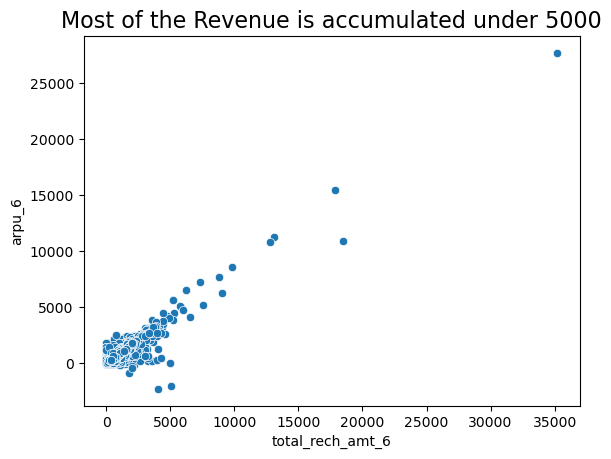

In [53]:
sns.scatterplot(x= tele["total_rech_amt_6"],y= tele["arpu_6"])
plt.title("Most of the Revenue is accumulated under 5000",fontsize=16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

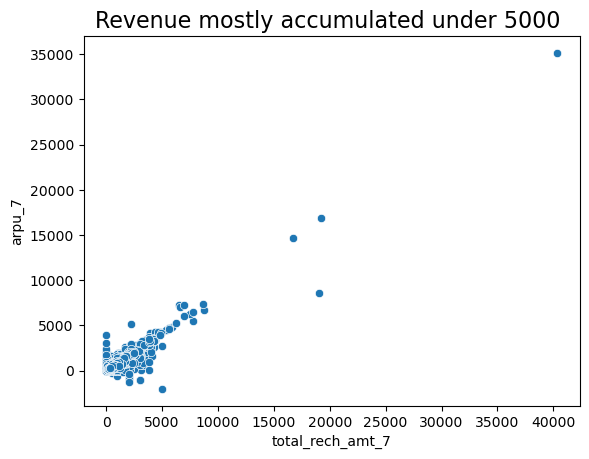

In [54]:
sns.scatterplot(x= tele["total_rech_amt_7"],y= tele["arpu_7"])
plt.title("Revenue mostly accumulated under 5000 ",fontsize=16)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

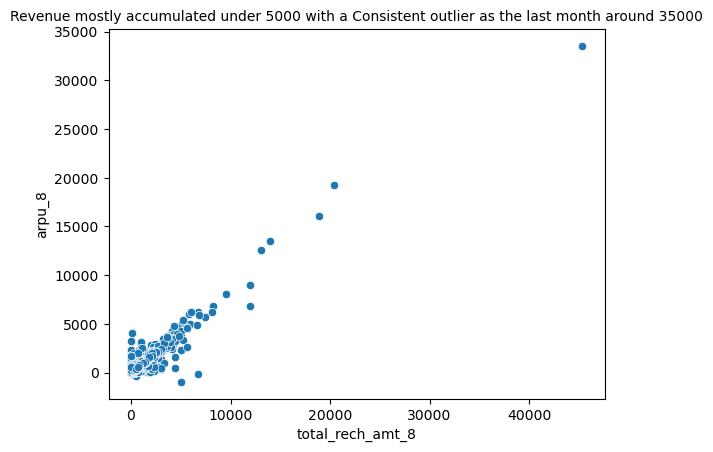

In [55]:
sns.scatterplot(x= tele["total_rech_amt_8"],y= tele["arpu_8"])
plt.title("Revenue mostly accumulated under 5000 with a Consistent outlier as the last month around 35000",fontsize=10)
plt.show

### Based on the top 3 visualisations we can see that most of revenue is accumulated under 5000 in the first month with an outlier going uptill 25000. But in the next 2 months we can see that the revenue slowly creeping into the 10000 as well with outliers lying around 35000. 

## Tagging Churners and deleting all the attributes corresponding to the churn phase.

#### To do this as mentioned, The attributes you need to use to tag churners are:

##### total_ic_mou_9

##### total_og_mou_9

##### vol_2g_mb_9

##### vol_3g_mb_9

In [56]:
tele['churn'] = np.where((tele['total_ic_mou_9']==0) & (tele['total_og_mou_9']==0) & (tele['vol_2g_mb_9']==0) & (tele['vol_3g_mb_9']==0), 1, 0)

In [57]:
tele.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,avrg_rechrg_amt_6_7,churn
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,166.787,413.69,351.03,...,0,0,0,315,21.03,910.65,122.16,0.0,519.0,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,322.732,501.76,108.39,...,0,0,0,2607,0.00,0.00,0.00,0.0,380.0,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,206.490,50.51,74.01,...,0,0,0,511,0.00,2.45,21.89,0.0,459.0,0
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,257.583,1185.91,9.28,...,0,0,0,667,0.00,0.00,0.00,0.0,408.0,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,578.596,102.41,132.11,...,0,0,0,720,0.00,0.00,0.00,0.0,640.0,0


In [58]:
col_9 = [col for col in tele.columns.to_list() if '_9' in col]
print(col_9)

['arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'last_day_rch_amt_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9']


In [59]:
tele = tele.drop(col_9, axis=1)

In [60]:
tele = tele.drop('sep_vbc_3g', axis=1)

### Checking for the Percentage of churn

In [62]:
tele['mobile_number'] = tele['mobile_number'].astype(object)
tele['churn'] = tele['churn'].astype(object)

In [63]:
numeric_cols = tele.select_dtypes(exclude=['object']).columns
print(numeric_cols)

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'arpu_6',
       'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8',
       'offnet_mou_6',
       ...
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g',
       'avrg_rechrg_amt_6_7'],
      dtype='object', length=134)


In [64]:
for col in numeric_cols: 
    q1 = tele[col].quantile(0.10)
    q3 = tele[col].quantile(0.90)
    iqr = q3-q1
    range_low  = q1-1.5*iqr
    range_high = q3+1.5*iqr
    
    data = tele.loc[(tele[col] > range_low) & (tele[col] < range_high)]

data.shape

(27705, 136)

### Introducing new columns that indicate amount of decrease in the action phase than in the good phase for Attributes such as :
#### > MOU
#### > RECH_NUM
#### > RECH_AMT
#### > ARPU
#### >VOL

In [65]:
[total for total in data.columns.to_list() if 'total' in total]

['total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'total_rech_num_6',
 'total_rech_num_7',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8']

### New Column decrease_mou_in_action

In [66]:
data['total_mou_good'] = (data['total_og_mou_6'] + data['total_ic_mou_6'])

In [67]:
data['avg_mou_action'] = (data['total_og_mou_7'] + data['total_og_mou_8'] + data['total_ic_mou_7'] + data['total_ic_mou_8'])/2

In [68]:
data['diff_mou'] = data['avg_mou_action'] - data['total_mou_good']

In [69]:
data['decrease_mou_in_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [70]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,avrg_rechrg_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,519.0,0,612.22,324.125,-288.095,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,380.0,0,1875.70,1262.390,-613.310,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,459.0,0,711.67,597.705,-113.965,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,408.0,0,1341.41,1.560,-1339.850,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,640.0,0,1067.43,1245.130,177.700,0


### New column decrease_rech_num_in_action

In [71]:
data['avg_rech_num_action'] = (data['total_rech_num_7'] + data['total_rech_num_8'])/2

In [72]:
data['diff_rech_num'] = data['avg_rech_num_action'] - data['total_rech_num_6']

In [73]:
data['decrease_rech_num_in_action'] = np.where((data['diff_rech_num'] < 0), 1, 0)

In [74]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,jun_vbc_3g,avrg_rechrg_amt_6_7,churn,total_mou_good,avg_mou_action,diff_mou,decrease_mou_in_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,122.16,519.0,0,612.22,324.125,-288.095,1,17.5,-1.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0.00,380.0,0,1875.70,1262.390,-613.310,1,7.5,1.5,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,21.89,459.0,0,711.67,597.705,-113.965,1,4.0,-6.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,0.00,408.0,0,1341.41,1.560,-1339.850,1,3.0,-16.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0.00,640.0,0,1067.43,1245.130,177.700,0,26.5,4.5,0


### New column decrease_rech_amt_in_action

In [75]:
data['avg_rech_amt_action'] = (data['total_rech_amt_7'] + data['total_rech_amt_8'])/2

In [76]:
data['diff_rech_amt'] = data['avg_rech_amt_action'] - data['total_rech_amt_6']

In [77]:
data['decrease_rech_amt_in_action'] = np.where((data['diff_rech_amt'] < 0), 1, 0)

In [55]:
# Checking whether the mou has decreased in action phase
data['decrease_mou_action'] = np.where((data['diff_mou'] < 0), 1, 0)

In [78]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,total_mou_good,avg_mou_action,diff_mou,decrease_mou_in_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_in_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,612.22,324.125,-288.095,1,17.5,-1.5,1,360.5,-76.5,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1875.70,1262.390,-613.310,1,7.5,1.5,0,485.0,-22.0,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,711.67,597.705,-113.965,1,4.0,-6.0,1,254.0,-316.0,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1341.41,1.560,-1339.850,1,3.0,-16.0,1,15.0,-801.0,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,1067.43,1245.130,177.700,0,26.5,4.5,0,699.0,99.0,0


### New column decrease_arpu_in_action

In [79]:
data['avg_arpu_action'] = (data['arpu_7'] + data['arpu_8'])/2

In [80]:
data['diff_arpu'] = data['avg_arpu_action'] - data['arpu_6']

In [81]:
data['decrease_arpu_in_action'] = np.where(data['diff_arpu'] < 0, 1, 0)

In [82]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_mou_in_action,avg_rech_num_action,diff_rech_num,decrease_rech_num_in_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_in_action,avg_arpu_action,diff_arpu,decrease_arpu_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,17.5,-1.5,1,360.5,-76.5,1,314.7925,-63.9285,1
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,1,7.5,1.5,0,485.0,-22.0,1,399.4655,-93.3805,1
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,4.0,-6.0,1,254.0,-316.0,1,243.8815,-187.0935,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,3.0,-16.0,1,15.0,-801.0,1,22.2395,-667.7685,1
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,26.5,4.5,0,699.0,99.0,0,617.7565,103.3035,0


### New column decrease_vbc_in_action

In [83]:
data['avg_vbc_3g_action'] = (data['jul_vbc_3g'] + data['aug_vbc_3g'])/2

In [84]:
data['diff_vbc'] = data['avg_vbc_3g_action'] - data['jun_vbc_3g']

In [85]:
data['decrease_vbc_in_action'] = np.where(data['diff_vbc'] < 0 , 1, 0)

In [86]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_in_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_in_action,avg_arpu_action,diff_arpu,decrease_arpu_in_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


# Now let us perform EDA. 



## Univariate Analysis.

### Now we can go ahead and check the decrease in churn rate in Action Month. 

In [87]:
data['churn'] = data['churn'].astype('int64')

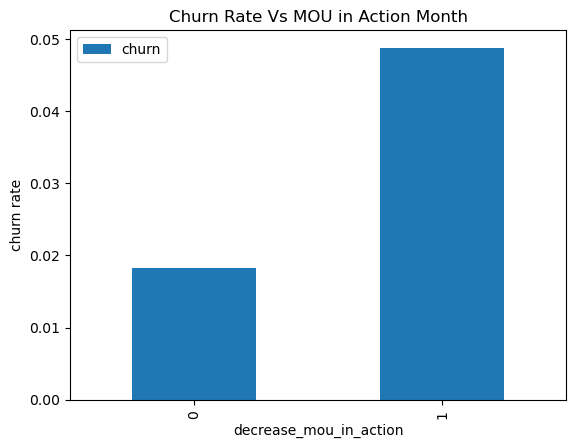

In [88]:
data.pivot_table(values='churn', index='decrease_mou_in_action', aggfunc='mean').plot.bar()
plt.title('Churn Rate Vs MOU in Action Month', fontsize= 12)
plt.ylabel('churn rate')
plt.show()

##### We can see that churn rate is more for the customers whose MOU decreased in the Action Month. 

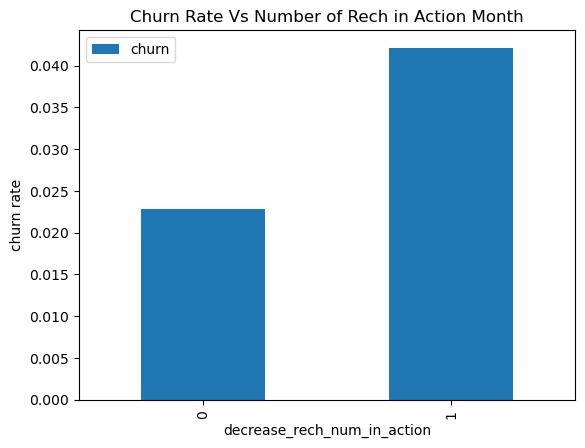

In [89]:
data.pivot_table(values='churn', index='decrease_rech_num_in_action', aggfunc='mean').plot.bar()
plt.title('Churn Rate Vs Number of Rech in Action Month', fontsize= 12)
plt.ylabel('churn rate')
plt.show()

### As we can see that the churn rate is more for those with lesser number of recharge in the good phase. 

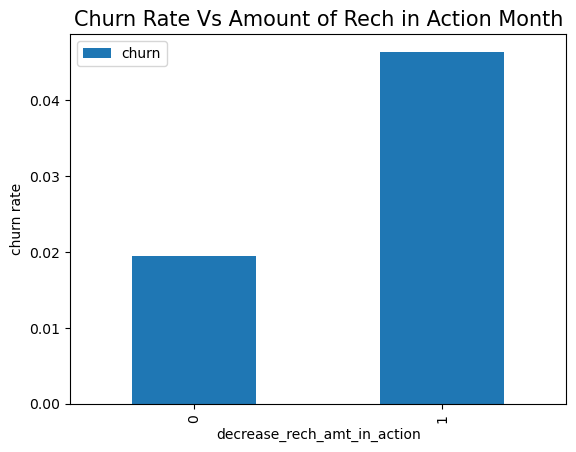

In [90]:
data.pivot_table(values='churn', index='decrease_rech_amt_in_action', aggfunc='mean').plot.bar()
plt.title('Churn Rate Vs Amount of Rech in Action Month', fontsize= 15)
plt.ylabel('churn rate')
plt.show()

### Similarly churn rate is more for those whose amount of Recharge is is less in the good Phase. 

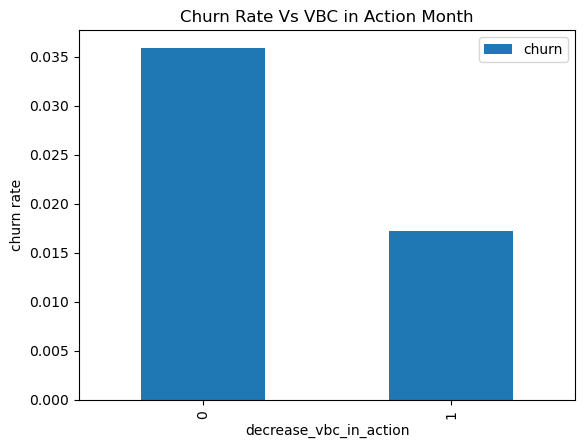

In [91]:
data.pivot_table(values='churn', index='decrease_vbc_in_action', aggfunc='mean').plot.bar()
plt.title('Churn Rate Vs VBC in Action Month', fontsize= 12)
plt.ylabel('churn rate')
plt.show()

### As we can see that Churn Rate is more for the customers whose VBC is increased in the Action month, which means that cutomers are not prone to doing monthly recharge. 

### Analysing ARPU in action phase. 

In [92]:
data_churn = data[data['churn'] == 1]
data_non_churn = data[data['churn'] == 0]

In [93]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_in_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_in_action,avg_arpu_action,diff_arpu,decrease_arpu_in_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


[Text(0.5, 0, 'Action phase ARPU')]

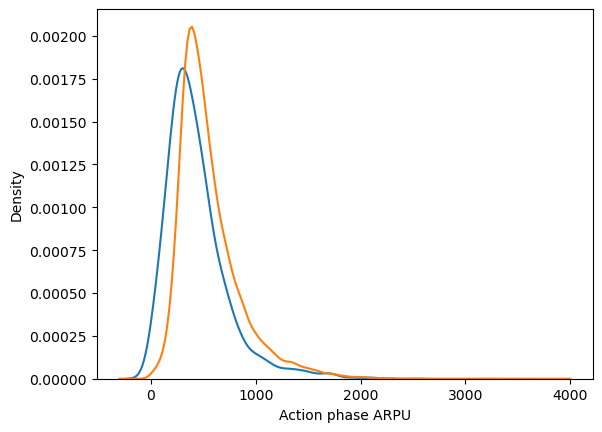

In [94]:
ax = sns.distplot(data_churn['avg_arpu_action'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['avg_arpu_action'],label='not churn',hist=False)
ax.set(xlabel='Action phase ARPU')

### Analysis shows our previous inference to be true that Higher the rate of ARPU means lower the rate of churn. 

[Text(0.5, 0, 'Action phase MOU')]

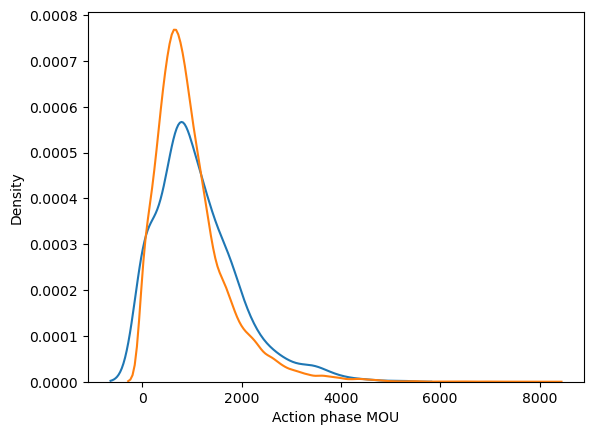

In [95]:
ax = sns.distplot(data_churn['total_mou_good'],label='churn',hist=False)
ax = sns.distplot(data_non_churn['total_mou_good'],label='non churn',hist=False)
ax.set(xlabel='Action phase MOU')

#### We can see and count our inference to be true that Higher the rate of MOU lesser the rate of churn will be.


## Bivariate analysis.

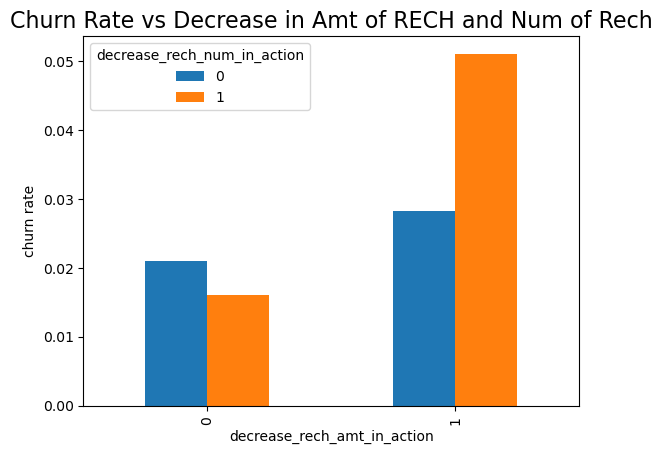

In [96]:
data.pivot_table(values='churn', index='decrease_rech_amt_in_action', columns='decrease_rech_num_in_action', aggfunc='mean').plot.bar()
plt.title('Churn Rate vs Decrease in Amt of RECH and Num of Rech',fontsize=16)
plt.ylabel('churn rate')
plt.show()

#### As we can see that the churn rate is more for the customers, whose recharge amount as well as number of recharge have decreased in the action phase than the good phase. 

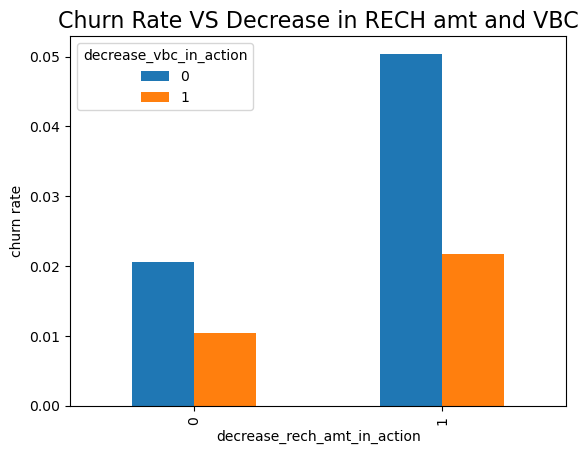

In [97]:
data.pivot_table(values='churn', index='decrease_rech_amt_in_action', columns='decrease_vbc_in_action', aggfunc='mean').plot.bar()
plt.title('Churn Rate VS Decrease in RECH amt and VBC', fontsize=16)
plt.ylabel('churn rate')
plt.show()

#### Here we can see that  churn rate is more for the customers, whose recharge amount is decreased along with the volume based cost is increased in the action month. 

### Now let us analyze the average recharge amount to the number of recharge. 

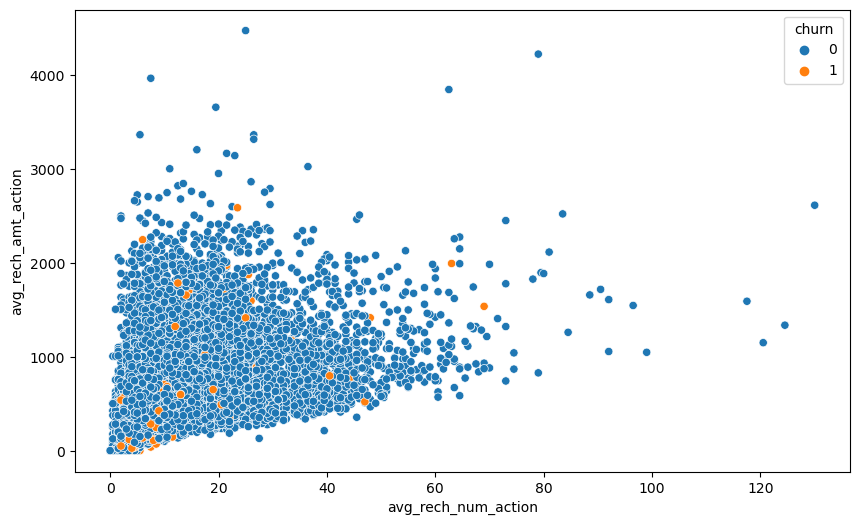

In [98]:
plt.figure(figsize=(10, 6))
ax = sns.scatterplot(x='avg_rech_num_action', y='avg_rech_amt_action', hue='churn', data=data)
plt.show()

### As we can see from the scatterplot that the Percentage of churners are very less also it shows a very distinct proportionality. 


#### Dropping a few columns. 

In [99]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,decrease_rech_num_in_action,avg_rech_amt_action,diff_rech_amt,decrease_rech_amt_in_action,avg_arpu_action,diff_arpu,decrease_arpu_in_action,avg_vbc_3g_action,diff_vbc,decrease_vbc_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,1,360.5,-76.5,1,314.7925,-63.9285,1,465.840,343.680,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,0,485.0,-22.0,1,399.4655,-93.3805,1,0.000,0.000,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,1,254.0,-316.0,1,243.8815,-187.0935,1,1.225,-20.665,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,1,15.0,-801.0,1,22.2395,-667.7685,1,0.000,0.000,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,0,699.0,99.0,0,617.7565,103.3035,0,0.000,0.000,0


In [100]:
data = data.drop(['total_mou_good','avg_mou_action','diff_mou','avg_rech_num_action','diff_rech_num','avg_rech_amt_action',
                 'diff_rech_amt','avg_arpu_action','diff_arpu','avg_vbc_3g_action','diff_vbc','avrg_rechrg_amt_6_7'], axis=1)

In [101]:
data.head()

,mobile_number,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,...,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn,decrease_mou_in_action,decrease_rech_num_in_action,decrease_rech_amt_in_action,decrease_arpu_in_action,decrease_vbc_in_action
8,7001524846,0.0,0.0,0.0,378.721,492.223,137.362,413.69,351.03,35.08,...,315,21.03,910.65,122.16,0,1,1,1,1,0
13,7002191713,0.0,0.0,0.0,492.846,205.671,593.260,501.76,108.39,534.24,...,2607,0.00,0.00,0.00,0,1,0,1,1,0
16,7000875565,0.0,0.0,0.0,430.975,299.869,187.894,50.51,74.01,70.61,...,511,0.00,2.45,21.89,0,1,1,1,1,1
17,7000187447,0.0,0.0,0.0,690.008,18.980,25.499,1185.91,9.28,7.79,...,667,0.00,0.00,0.00,0,1,1,1,1,0
21,7002124215,0.0,0.0,0.0,514.453,597.753,637.760,102.41,132.11,85.14,...,720,0.00,0.00,0.00,0,0,0,0,0,0


# Train Test split.

#### Now let us perform train test split in ratio of 80%:20%

In [102]:
from sklearn.model_selection import train_test_split

In [103]:
X = data.drop(['mobile_number','churn'], axis=1)

In [104]:
y = data['churn']

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=100)

In [106]:
X_train.head(2)

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_in_action,decrease_rech_num_in_action,decrease_rech_amt_in_action,decrease_arpu_in_action,decrease_vbc_in_action
76637,0.0,0.0,0.0,616.869,395.590,315.870,436.71,24.69,38.48,340.59,...,0,796,5.65,0.0,104.88,1,1,1,1,1
44417,0.0,0.0,0.0,137.752,1903.551,1555.414,55.08,236.09,222.04,75.66,...,0,428,0.00,0.0,0.00,0,0,0,0,0


### Feature Scaling

In [107]:
# Standardization method
from sklearn.preprocessing import StandardScaler

In [108]:
# Instantiate the Scaler
scaler = StandardScaler()

In [110]:
# List of the numeric columns
cols_scale = X_train.columns.to_list()

In [111]:
# Fit the data into scaler and transform
X_train[cols_scale] = scaler.fit_transform(X_train[cols_scale])

In [112]:
X_train.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_in_action,decrease_rech_num_in_action,decrease_rech_amt_in_action,decrease_arpu_in_action,decrease_vbc_in_action
76637,0.0,0.0,0.0,0.177042,-0.565237,-0.615403,0.342004,-0.607254,-0.528515,-0.153098,...,-0.146661,-0.509556,-0.324997,-0.338332,-0.032583,0.998107,0.887367,0.955682,0.970039,2.674794
44417,0.0,0.0,0.0,-1.385359,4.245131,2.814453,-0.542001,-0.146232,-0.118059,-0.772620,...,-0.146661,-0.884874,-0.339808,-0.338332,-0.317058,-1.001897,-1.126930,-1.046373,-1.030886,-0.373861
77582,0.0,0.0,0.0,-0.185183,0.470514,0.439043,-0.475845,-0.539126,-0.408638,-0.320016,...,1.820414,1.181411,2.342626,1.965731,1.189782,0.998107,-1.126930,-1.046373,-1.030886,-0.373861
48224,0.0,0.0,0.0,-0.871138,0.761096,0.363448,-0.592545,-0.594671,-0.522008,-0.787657,...,-0.146661,-1.025617,-0.339808,-0.338332,-0.317058,-1.001897,-1.126930,-1.046373,-1.030886,-0.373861
76321,0.0,0.0,0.0,0.307153,0.183378,0.873588,-0.192921,-0.085344,-0.012023,1.064736,...,-0.146661,-0.648260,-0.339808,-0.338332,-0.317058,-1.001897,-1.126930,-1.046373,-1.030886,-0.373861


### Scaling the test set
#### We don't fit scaler on the test set. We only transform the test set.

In [113]:
# Transform the test set
X_test[cols_scale] = scaler.transform(X_test[cols_scale])
X_test.head()

,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,...,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,decrease_mou_in_action,decrease_rech_num_in_action,decrease_rech_amt_in_action,decrease_arpu_in_action,decrease_vbc_in_action
5704,0.0,0.0,0.0,0.280204,-0.318483,0.630203,-0.619183,-0.637742,-0.538175,0.608858,...,1.820414,0.003445,-0.133609,0.020306,-0.317058,-1.001897,-1.126930,0.955682,0.970039,-0.373861
64892,0.0,0.0,0.0,0.084955,-0.814767,-0.500458,-0.629329,-0.646247,-0.560938,-0.314708,...,-0.146661,0.351226,1.677391,1.705824,4.389368,0.998107,0.887367,0.955682,0.970039,2.674794
39613,0.0,0.0,0.0,0.580284,0.121878,1.016326,-0.401743,-0.455056,-0.298176,0.840667,...,-0.146661,2.402212,-0.339808,-0.338332,-0.317058,0.998107,0.887367,0.955682,-1.030886,-0.373861
93118,0.0,0.0,0.0,0.675978,0.736183,-0.551999,0.150901,0.142507,-0.252783,-0.083998,...,-0.146661,1.331334,-0.339808,-0.338332,-0.317058,0.998107,-1.126930,0.955682,0.970039,-0.373861
81235,0.0,0.0,0.0,3.901497,0.828475,2.319996,4.977103,1.683836,2.385666,0.075648,...,0.836877,-0.407568,-0.339808,-0.338332,-0.317058,0.998107,0.887367,0.955682,0.970039,-0.373861


# Model with PCA

In [114]:
#Import PCA
from sklearn.decomposition import PCA

In [115]:
# Instantiate PCA
pca = PCA(random_state=42)

In [116]:
# Fit train set on PCA
pca.fit(X_train)

PCA(random_state=42)

In [117]:
# Principal components
pca.components_

array([[-3.09418106e-19,  1.11022302e-16,  2.22044605e-16, ...,
        -2.44555397e-02, -2.23650455e-02,  3.32072971e-02],
       [-1.93722400e-19, -0.00000000e+00,  5.55111512e-17, ...,
        -3.58500612e-02, -3.28727808e-02, -5.67492765e-02],
       [ 9.26366202e-20,  1.38777878e-17, -1.38777878e-17, ...,
        -6.14914311e-02, -5.98142863e-02,  1.17398754e-01],
       ...,
       [ 0.00000000e+00, -6.19094633e-02, -2.11147445e-02, ...,
        -8.84708973e-17,  1.50920942e-16,  1.07552856e-16],
       [ 0.00000000e+00, -1.53091805e-02, -2.68219407e-03, ...,
         8.15320034e-17, -2.38958159e-16,  1.12757026e-17],
       [ 9.99993773e-01, -5.68136702e-04,  3.47820432e-03, ...,
         2.16840434e-19, -7.58941521e-19, -5.63785130e-18]])

In [118]:
# Cumuliative varinace of the PCs
variance_cumu = np.cumsum(pca.explained_variance_ratio_)
print(variance_cumu)

[0.09546122 0.18210102 0.23514801 0.28118054 0.31975648 0.35698696
 0.39353377 0.42103897 0.44641812 0.47099581 0.49410177 0.51653796
 0.53759762 0.55818007 0.57724658 0.59522715 0.61119761 0.62559601
 0.63959545 0.65336956 0.66661367 0.67931797 0.6911561  0.7021809
 0.71279545 0.72285096 0.73280985 0.74239265 0.75123254 0.75990786
 0.76803171 0.77583467 0.78348368 0.79062055 0.79752025 0.80425219
 0.8107618  0.81705537 0.82329039 0.82941269 0.83535391 0.84123764
 0.84681883 0.85225516 0.85759284 0.86268726 0.86759737 0.87238971
 0.87702718 0.881409   0.88564245 0.88974174 0.89365078 0.89747082
 0.90124017 0.90492542 0.9085194  0.91209093 0.91544268 0.91876994
 0.92196695 0.92507047 0.92813007 0.93101052 0.93384427 0.93664193
 0.93935798 0.9420498  0.94470861 0.94731855 0.94980142 0.95225699
 0.95469067 0.95707385 0.95936229 0.96162187 0.96369155 0.96570006
 0.96765425 0.96957513 0.97145883 0.97328167 0.97507892 0.97684951
 0.97858991 0.98027089 0.98189646 0.98347796 0.98503164 0.98656

Text(0, 0.5, 'Cumulative Variance')

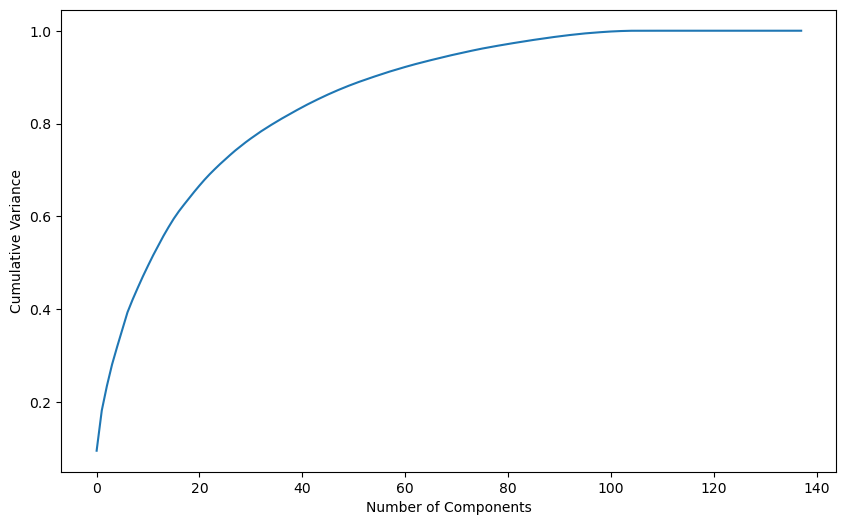

In [119]:
# Plotting scree plot
fig = plt.figure(figsize = (10,6))
plt.plot(variance_cumu)
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')

#### We can see that 60 components explain amost more than 90% variance of the data. So, we will perform PCA with 60 components.

### Performing PCA with 60 components

In [120]:
# Importing incremental PCA
from sklearn.decomposition import IncrementalPCA

In [121]:
# Instantiate PCA with 60 components
pca_final = IncrementalPCA(n_components=60)

In [122]:
# Fit and transform the X_train
X_train_pca = pca_final.fit_transform(X_train)

### Applying transformation on the test set
#### We are only doing Transform in the test set not the Fit-Transform. Because the Fitting is already done on the train set. So, we just have to do the transformation with the already fitted data on the train set.

In [123]:
X_test_pca = pca_final.transform(X_test)

### Emphasize Sensitivity/Recall than Accuracy

#### We are more focused on higher Sensitivity/Recall score than the accuracy.

Beacuse we need to care more about churn cases than the not churn cases. The main goal is to reatin the customers, who have the possiblity to churn. There should not be a problem, if we consider few not churn customers as churn customers and provide them some incentives for retaining them. Hence, the sensitivity score is more important here.

## Logistic regression with PCA

In [124]:
# Importing scikit logistic regression module
from sklearn.linear_model import LogisticRegression

In [125]:
# Impoting metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix

### Tuning hyperparameter  C
#### C is the the inverse of regularization strength in Logistic Regression. Higher values of C correspond to less regularization.

In [126]:
# Importing libraries for cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [127]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as recall as we are more focused on acheiving the higher sensitivity than the accuracy
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params, 
                        scoring= 'recall', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True) 

# Fit the model
model_cv.fit(X_train_pca, y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=KFold(n_splits=5, random_state=4, shuffle=True),
             estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100, 1000]},
             return_train_score=True, scoring='recall', verbose=1)

In [128]:
# results of grid search CV
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.251754,0.140088,0.005006,0.001915,0.01,{'C': 0.01},0.035971,0.036585,0.055172,0.020690,...,0.033793,0.012781,6,0.041667,0.045217,0.040404,0.043771,0.040472,0.042306,0.001898
1,0.365078,0.024888,0.005398,0.002189,0.1,{'C': 0.1},0.057554,0.067073,0.062069,0.048276,...,0.053844,0.011589,5,0.066667,0.069565,0.069024,0.060606,0.062395,0.065651,0.003572
2,0.592594,0.116498,0.006933,0.003072,1,{'C': 1},0.064748,0.073171,0.062069,0.055172,...,0.057881,0.013148,1,0.080000,0.074783,0.077441,0.065657,0.067454,0.073067,0.005596
3,0.659279,0.085099,0.004541,0.003020,10,{'C': 10},0.057554,0.073171,0.062069,0.055172,...,0.057812,0.010397,2,0.083333,0.076522,0.084175,0.067340,0.072513,0.076777,0.006403
4,0.582334,0.109651,0.005465,0.003656,100,{'C': 100},0.057554,0.073171,0.062069,0.055172,...,0.057812,0.010397,2,0.083333,0.076522,0.084175,0.067340,0.072513,0.076777,0.006403
5,0.780998,0.285711,0.003199,0.001312,1000,{'C': 1000},0.057554,0.073171,0.062069,0.055172,...,0.057812,0.010397,2,0.083333,0.076522,0.084175,0.067340,0.072513,0.076777,0.006403


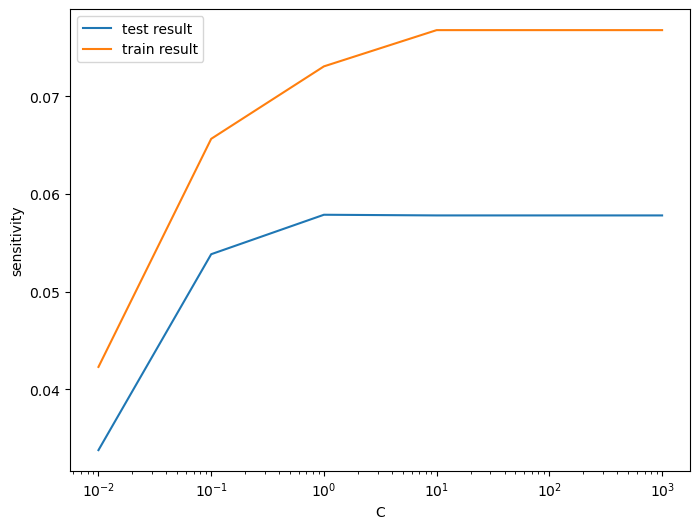

In [129]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [130]:
# Best score with best C
best_score = model_cv.best_score_
best_C = model_cv.best_params_['C']

print(" The highest test sensitivity is {0} at C = {1}".format(best_score, best_C))

 The highest test sensitivity is 0.05788137755979532 at C = 1


### Logistic regression with optimal C

In [131]:
# Instantiate the model with best C
logistic_pca = LogisticRegression(C=best_C)

In [132]:
# Fit the model on the train set
log_pca_model = logistic_pca.fit(X_train_pca, y_train)

### Prediction on the train set

In [133]:
# Predictions on the train set
y_train_pred = log_pca_model.predict(X_train_pca)

In [134]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21375    50]
 [  691    48]]


In [135]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [136]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9665674066053059
Sensitivity:- 0.06495263870094722
Specificity:- 0.9976662777129521


### Prediction on the test set

In [137]:
# Prediction on the test set
y_test_pred = log_pca_model.predict(X_test_pca)

In [138]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5337   11]
 [ 177   16]]


In [139]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [140]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9660711062985021
Sensitivity:- 0.08290155440414508
Specificity:- 0.9979431563201197


***Model summary***

- Train set
    - Accuracy = 0.96
    - Sensitivity = 0.64
    - Specificity = 0.99
- Test set
    - Accuracy = 0.96
    - Sensitivity = 0.82
    - Specificity = 0.99
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

## Support Vector Machine(SVM) with PCA

In [141]:
# Importing SVC
from sklearn.svm import SVC

#### Hyperparameter tuning

C:- Regularization parameter.

gamma:- Handles non linear classifications.

In [142]:
# specify range of hyperparameters

hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model with RBF kernel
model = SVC(kernel="rbf")

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = 3, 
                        verbose = 1,
                        return_train_score=True)      

# fit the model
model_cv.fit(X_train_pca, y_train)                  


Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='accuracy', verbose=1)

In [145]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.400827,0.028466,1.327658,0.028853,1,0.01,"{'C': 1, 'gamma': 0.01}",0.966838,0.966838,0.966973,0.966883,0.000064,1,0.967380,0.967989,0.968192,0.967853,0.000345
1,1.022283,0.028591,0.832744,0.089536,1,0.001,"{'C': 1, 'gamma': 0.001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
2,0.633482,0.011307,0.674271,0.020025,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.966703,0.966703,0.966567,0.966658,0.000064,2,0.966635,0.966635,0.966703,0.966658,0.000032
3,1.256185,0.035560,1.173499,0.012789,10,0.01,"{'C': 10, 'gamma': 0.01}",0.966567,0.964402,0.965485,0.965485,0.000884,9,0.977734,0.978005,0.978411,0.978050,0.000278
4,1.100075,0.060304,0.774507,0.033413,10,0.001,"{'C': 10, 'gamma': 0.001}",0.966567,0.966838,0.966567,0.966658,0.000128,2,0.967177,0.967244,0.967447,0.967289,0.000115
5,1.394846,0.097259,0.849578,0.004259,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.966703,0.966703,0.966432,0.966613,0.000128,5,0.966635,0.966635,0.966770,0.966680,0.000064
6,1.449971,0.035671,0.985820,0.043119,100,0.01,"{'C': 100, 'gamma': 0.01}",0.957905,0.956010,0.957499,0.957138,0.000815,11,0.991608,0.992352,0.992014,0.991992,0.000304
7,1.380770,0.131614,0.763697,0.044924,100,0.001,"{'C': 100, 'gamma': 0.001}",0.966432,0.966838,0.965620,0.966297,0.000506,8,0.969613,0.970628,0.970628,0.970290,0.000479
8,1.596489,0.139759,0.697740,0.020900,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.966703,0.966703,0.965891,0.966432,0.000383,7,0.966635,0.966770,0.966906,0.966770,0.000111
9,1.609344,0.056472,0.834997,0.011997,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.946264,0.945723,0.950054,0.947347,0.001927,12,0.999391,0.998917,0.999053,0.999120,0.000199


##### Plotting the accuracy with various C and gamma values

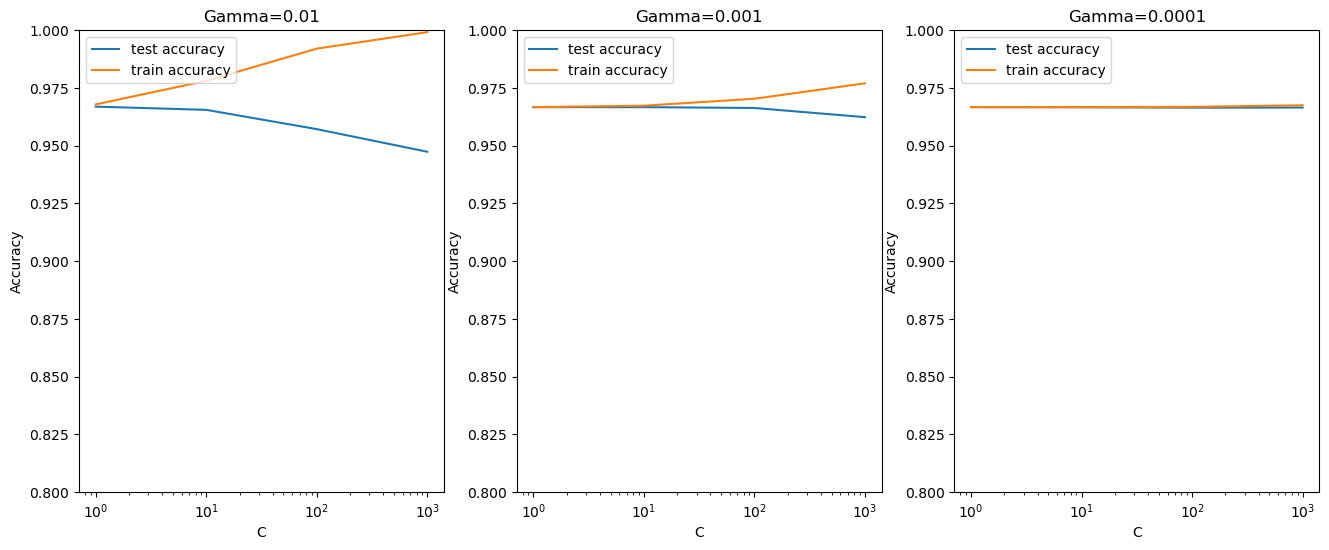

In [146]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.80, 1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')



In [169]:
# Printing the best score 
best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best test score is 0.9668381158635625 corresponding to hyperparameters {'C': 1, 'gamma': 0.01}


From the above plot, we can see that higher value of gamma leads to overfitting the model. With the lowest value of gamma (0.0001) we have train and test accuracy almost same.

Also, at C=100 we have a good accuracy and the train and test scores are comparable.

##### Build the model with optimal hyperparameters

In [147]:
# Building the model with optimal hyperparameters
svm_pca_model = SVC(C=100, gamma=0.0001, kernel="rbf")

svm_pca_model.fit(X_train_pca, y_train)

SVC(C=100, gamma=0.0001)

##### Prediction on the train set

In [148]:
# Predictions on the train set
y_train_pred = svm_pca_model.predict(X_train_pca)

In [149]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21425     0]
 [  737     2]]


In [150]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [151]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9667478794441436
Sensitivity:- 0.0027063599458728013
Specificity:- 1.0


##### Prediction on the test set

In [152]:
# Prediction on the test set
y_test_pred = svm_pca_model.predict(X_test_pca)

In [153]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5348    0]
 [ 193    0]]


In [154]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [155]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9651687421043132
Sensitivity:- 0.0
Specificity:- 1.0


## Decision tree with PCA

In [156]:
# Importing decision tree classifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameter tuning

In [157]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree, 
                           param_grid = param_grid, 
                           scoring= 'recall',
                           cv = 5, 
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_pca,y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='recall', verbose=1)

In [158]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.521818,0.019340,0.001836,0.000152,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.054054,0.000000,0.074324,0.033784,0.027211,0.037875,0.025121,3
1,0.522115,0.020118,0.001718,0.000185,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.054054,0.000000,0.074324,0.033784,0.027211,0.037875,0.025121,3
2,0.490521,0.026488,0.001575,0.000110,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.054054,0.000000,0.067568,0.000000,0.047619,0.033848,0.028377,5
3,0.472886,0.005748,0.001643,0.000207,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.054054,0.000000,0.067568,0.000000,0.047619,0.033848,0.028377,5
4,0.847861,0.027990,0.001606,0.000064,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.094595,0.074324,0.101351,0.033784,0.088435,0.078498,0.024070,1
5,0.837645,0.006422,0.001504,0.000100,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.094595,0.074324,0.101351,0.033784,0.088435,0.078498,0.024070,1
6,0.905202,0.068062,0.001977,0.000302,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.054054,0.000000,0.067568,0.000000,0.047619,0.033848,0.028377,5
7,0.861595,0.023613,0.001828,0.000202,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.054054,0.000000,0.067568,0.000000,0.047619,0.033848,0.028377,5


In [159]:
# Printing the optimal sensitivity score and hyperparameters
print("Best sensitivity:-", grid_search.best_score_)
print(grid_search.best_estimator_)

Best sensitivity:- 0.07849788564074278
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


##### Model with optimal hyperparameters

In [160]:
# Model with optimal hyperparameters
dt_pca_model = DecisionTreeClassifier(criterion = "gini", 
                                  random_state = 100,
                                  max_depth=10, 
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_pca_model.fit(X_train_pca, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

##### Prediction on the train set

In [161]:
# Predictions on the train set
y_train_pred = dt_pca_model.predict(X_train_pca)

In [162]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

[[21373    52]
 [  662    77]]


In [163]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [164]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9677855982674608
Sensitivity:- 0.10419485791610285
Specificity:- 0.9975729288214702


##### Prediction on the test set

In [165]:
# Prediction on the test set
y_test_pred = dt_pca_model.predict(X_test_pca)

In [166]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[5334   14]
 [ 178   15]]


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9653492149431511
Sensitivity:- 0.07772020725388601
Specificity:- 0.9973821989528796


## Random forest with PCA

In [169]:
# Importing random forest classifier
from sklearn.ensemble import RandomForestClassifier

##### Hyperparameter tuning

In [ ]:
param_grid = {
    'max_depth': range(5,10,5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
    'n_estimators': [100,200,300], 
    'max_features': [10, 20]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, 
                           param_grid = param_grid, 
                           cv = 3,
                           n_jobs = -1,
                           verbose = 1, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_train_pca, y_train)


In [ ]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

##### Model with optimal hyperparameters

In [ ]:
# model with the best hyperparameters

rfc_model = RandomForestClassifier(bootstrap=True,
                             max_depth=5,
                             min_samples_leaf=50, 
                             min_samples_split=100,
                             max_features=20,
                             n_estimators=300)

In [ ]:
# Fit the model
rfc_model.fit(X_train_pca, y_train)

##### Prediction on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rfc_model.predict(X_train_pca)

In [ ]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_train, y_train_pred)
print(confusion)

In [163]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [164]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train, y_train_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8487514585764294
Sensitivity:- 0.8870945157526254
Specificity:- 0.8104084014002334


##### Prediction on the test set

In [165]:
# Prediction on the test set
y_test_pred = rfc_model.predict(X_test_pca)

In [166]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test, y_test_pred)
print(confusion)

[[4294 1054]
 [  47  146]]


In [167]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [168]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test, y_test_pred))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.8012994044396319
Sensitivity:- 0.7564766839378239
Specificity:- 0.8029169783096485


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.88
    - Specificity = 0.80
- Test set
    - Accuracy = 0.80
    - Sensitivity = 0.75
    - Specificity = 0.80
    
    
We can see from the model performance that the Sesitivity has been decreased while evaluating the model on the test set. However, the accuracy and specificity is quite good in the test set.

### Final conclusion with PCA
After trying several models we can see that for acheiving the best sensitivity, which was our ultimate goal, the classic Logistic regression or the SVM models preforms well. For both the models the sensitivity was approx 81%. Also we have good accuracy of apporx 85%.

# Without PCA

## Logistic regression with No PCA

In [169]:
##### Importing stats model
import statsmodels.api as sm

In [170]:
# Instantiate the model
# Adding the constant to X_train
log_no_pca = sm.GLM(y_train,(sm.add_constant(X_train)), family=sm.families.Binomial())

In [171]:
# Fit the model
log_no_pca = log_no_pca.fit().summary()

In [172]:
# Summary
log_no_pca

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42720
Model Family:                Binomial   Df Model:                          129
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 16 May 2020   Deviance:                          nan
Time:                        17:56:38   Pearson chi2:                 3.70e+05
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -73.1903   4452.100     -0.016      0.987   -8799.145    8652.765
loc_og_t2o_mou            7.163e-07   4.32e-05      0.017      0.987   -8.39e-05    8.53e-05
std_og_t2o_mou            2.572e-07   1.42e-05      0.018      0.986   -2.75e-05    2.81e-05
loc_ic_t2o_mou            1.441e-06   6.09e-05      0.024      0.981      -0.000       0.000
arpu_6                      -0.0338      0.081     -0.418      0.676      -0.192       0.124
arpu_7                       0.0855      0.086      0.994      0.320      -0.083       0.254
arpu_8                       0.0909      0.110      0.828      0.407      -0.124       0.306
onnet_mou_6                 15.5129      3.573      4.342      0.000       8.510      22.516
onnet_mou_7                 -4.3251      1.817     -2.380      0.017      -7.886      -0.764
onnet_mou_8                  2.3528      1.825      1.289      0.197      -1.225       5.930
offnet_mou_6                15.0874      3.361      4.489      0.000       8.500      21.674
offnet_mou_7                -1.7629      1.721     -1.024      0.306      -5.136       1.611
offnet_mou_8                -0.5496      1.883     -0.292      0.770      -4.240       3.141
roam_ic_mou_6                0.1622      0.036      4.473      0.000       0.091       0.233
roam_ic_mou_7               -0.0099      0.052     -0.189      0.850      -0.112       0.093
roam_ic_mou_8                0.2041      0.044      4.663      0.000       0.118       0.290
roam_og_mou_6               -5.1505      1.131     -4.554      0.000      -7.367      -2.934
roam_og_mou_7                0.8855      0.474      1.867      0.062      -0.044       1.815
roam_og_mou_8                0.0927      0.531      0.175      0.861      -0.948       1.133
loc_og_t2t_mou_6         -3302.8216    656.377     -5.032      0.000   -4589.297   -2016.346
loc_og_t2t_mou_7         -1474.6175    679.783     -2.169      0.030   -2806.968    -142.267
loc_og_t2t_mou_8          5516.1251    628.160      8.781      0.000    4284.953    6747.297
loc_og_t2m_mou_6         -3342.4429    664.131     -5.033      0.000   -4644.116   -2040.770
loc_og_t2m_mou_7         -1392.1079    641.104     -2.171      0.030   -2648.649    -135.567
loc_og_t2m_mou_8          5887.3829    670.271      8.784      0.000    4573.677    7201.089
loc_og_t2f_mou_6          -285.2245     56.710     -5.030      0.000    -396.373    -174.076
loc_og_t2f_mou_7          -123.0165     56.677     -2.171      0.030    -234.101     -11.933
loc_og_t2f_mou_8           487.3991     55.519      8.779      0.000     378.584     596.214
loc_og_t2c_mou_6             0.0433      0.022      1.982      0.048       0.000       0.086
loc_og_t2c_mou_7             0.0099      0.021      0.463      0.643      -0.032       0.052
loc_og_t2c_mou

***Model analysis***
1. We can see that there are few features have positive coefficients and few have negative.
2. Many features have higher p-values and hence became insignificant in the model.

***Coarse tuning (Auto+Manual)***

We'll first eliminate a few features using Recursive Feature Elimination (RFE), and once we have reached a small set of variables to work with, we can then use manual feature elimination (i.e. manually eliminating features based on observing the p-values and VIFs).

### Feature Selection Using RFE

In [173]:
# Importing logistic regression from sklearn
from sklearn.linear_model import LogisticRegression
# Intantiate the logistic regression
logreg = LogisticRegression()

#### RFE with 15 columns

In [174]:
# Importing RFE
from sklearn.feature_selection import RFE

# Intantiate RFE with 15 columns
rfe = RFE(logreg, 15)

# Fit the rfe model with train set
rfe = rfe.fit(X_train, y_train)

In [175]:
# RFE selected columns
rfe_cols = X_train.columns[rfe.support_]
print(rfe_cols)

Index(['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8',
       'isd_og_mou_8', 'og_others_7', 'og_others_8', 'loc_ic_t2f_mou_8',
       'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8',
       'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action'],
      dtype='object')


### Model-1 with RFE selected columns

In [176]:
# Adding constant to X_train
X_train_sm_1 = sm.add_constant(X_train[rfe_cols])

#Instantiate the model
log_no_pca_1 = sm.GLM(y_train, X_train_sm_1, family=sm.families.Binomial())

# Fit the model
log_no_pca_1 = log_no_pca_1.fit()

log_no_pca_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42834
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Sat, 16 May 2020   Deviance:                          nan
Time:                        18:04:18   Pearson chi2:                 4.49e+06
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                 -58.6610   4419.624     -0.013      0.989   -8720.965    8603.643
offnet_mou_7            0.6096      0.026     23.449      0.000       0.559       0.661
offnet_mou_8           -3.2532      0.106    -30.548      0.000      -3.462      -3.045
roam_og_mou_8           1.2482      0.032     39.496      0.000       1.186       1.310
std_og_t2m_mou_8        2.4408      0.094     26.101      0.000       2.258       2.624
isd_og_mou_8           -1.0212      0.194     -5.271      0.000      -1.401      -0.641
og_others_7            -1.1915      0.862     -1.382      0.167      -2.881       0.498
og_others_8         -4191.9652   3.22e+05     -0.013      0.990   -6.35e+05    6.27e+05
loc_ic_t2f_mou_8       -0.7547      0.072    -10.487      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9744      0.066    -30.078      0.000      -2.103      -1.846
std_ic_t2f_mou_8       -0.7922      0.075    -10.607      0.000      -0.939      -0.646
ic_others_8            -1.4913      0.132    -11.305      0.000      -1.750      -1.233
total_rech_num_8       -0.4840      0.018    -26.977      0.000      -0.519      -0.449
monthly_2g_8           -0.9031      0.043    -20.851      0.000      -0.988      -0.818
monthly_3g_8           -0.9871      0.043    -22.711      0.000      -1.072      -0.902
decrease_vbc_action    -1.3078      0.073    -17.956      0.000      -1.451      -1.165
=======================================================================================
"""

#### Checking VIFs

In [177]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [178]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[rfe_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[rfe_cols].values, i) for i in range(X_train[rfe_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
8,loc_ic_mou_8,1.68
7,loc_ic_t2f_mou_8,1.21
11,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
14,decrease_vbc_action,1.08
13,monthly_3g_8,1.06
6,og_others_8,1.05


##### Removing column og_others_8, which is insignificatnt as it has the highest p-value 0.99

In [179]:
# Removing og_others_8 column 
log_cols = rfe_cols.to_list()
log_cols.remove('og_others_8')
print(log_cols)

['offnet_mou_7', 'offnet_mou_8', 'roam_og_mou_8', 'std_og_t2m_mou_8', 'isd_og_mou_8', 'og_others_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8', 'std_ic_t2f_mou_8', 'ic_others_8', 'total_rech_num_8', 'monthly_2g_8', 'monthly_3g_8', 'decrease_vbc_action']


### Model-2
Building the model after removing og_others_8 variable.

In [180]:
# Adding constant to X_train
X_train_sm_2 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_2 = sm.GLM(y_train, X_train_sm_2, family=sm.families.Binomial())

# Fit the model
log_no_pca_2 = log_no_pca_2.fit()

log_no_pca_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42835
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15034.
Date:                Sat, 16 May 2020   Deviance:                       30068.
Time:                        18:06:36   Pearson chi2:                 4.51e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.1052      0.031    -35.342      0.000      -1.167      -1.044
offnet_mou_7            0.6081      0.026     23.427      0.000       0.557       0.659
offnet_mou_8           -3.2557      0.106    -30.603      0.000      -3.464      -3.047
roam_og_mou_8           1.2491      0.031     39.747      0.000       1.188       1.311
std_og_t2m_mou_8        2.4428      0.093     26.146      0.000       2.260       2.626
isd_og_mou_8           -1.0982      0.196     -5.590      0.000      -1.483      -0.713
og_others_7            -1.8793      0.818     -2.299      0.022      -3.482      -0.277
loc_ic_t2f_mou_8       -0.7548      0.072    -10.491      0.000      -0.896      -0.614
loc_ic_mou_8           -1.9714      0.066    -30.058      0.000      -2.100      -1.843
std_ic_t2f_mou_8       -0.8020      0.075    -10.727      0.000      -0.949      -0.655
ic_others_8            -1.4871      0.132    -11.278      0.000      -1.746      -1.229
total_rech_num_8       -0.4864      0.018    -27.146      0.000      -0.522      -0.451
monthly_2g_8           -0.9066      0.043    -20.866      0.000      -0.992      -0.821
monthly_3g_8           -0.9862      0.043    -22.700      0.000      -1.071      -0.901
decrease_vbc_action    -1.3097      0.073    -17.994      0.000      -1.452      -1.167
=======================================================================================
"""

#### Checking VIF for Model-2

In [181]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,offnet_mou_8,7.45
3,std_og_t2m_mou_8,6.27
0,offnet_mou_7,1.92
7,loc_ic_mou_8,1.68
6,loc_ic_t2f_mou_8,1.21
10,total_rech_num_8,1.19
2,roam_og_mou_8,1.16
13,decrease_vbc_action,1.08
12,monthly_3g_8,1.06
11,monthly_2g_8,1.05


As we can see from the model summary that all the variables p-values are significant and offnet_mou_8 column has the highest VIF 7.45. Hence, deleting offnet_mou_8 column.

In [182]:
# Removing offnet_mou_8 column
log_cols.remove('offnet_mou_8')

### Model-3
Model after removing offnet_mou_8 column.

In [183]:
# Adding constant to X_train
X_train_sm_3 = sm.add_constant(X_train[log_cols])

#Instantiate the model
log_no_pca_3 = sm.GLM(y_train, X_train_sm_3, family=sm.families.Binomial())

# Fit the model
log_no_pca_3 = log_no_pca_3.fit()

log_no_pca_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                42850
Model:                            GLM   Df Residuals:                    42836
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -15720.
Date:                Sat, 16 May 2020   Deviance:                       31440.
Time:                        18:07:30   Pearson chi2:                 3.92e+06
No. Iterations:                    11                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -1.2058      0.032    -37.536      0.000      -1.269      -1.143
offnet_mou_7            0.3665      0.022     16.456      0.000       0.323       0.410
roam_og_mou_8           0.7135      0.024     29.260      0.000       0.666       0.761
std_og_t2m_mou_8       -0.2474      0.022    -11.238      0.000      -0.291      -0.204
isd_og_mou_8           -1.3811      0.212     -6.511      0.000      -1.797      -0.965
og_others_7            -2.4711      0.872     -2.834      0.005      -4.180      -0.762
loc_ic_t2f_mou_8       -0.7102      0.075     -9.532      0.000      -0.856      -0.564
loc_ic_mou_8           -3.3287      0.057    -58.130      0.000      -3.441      -3.216
std_ic_t2f_mou_8       -0.9503      0.078    -12.181      0.000      -1.103      -0.797
ic_others_8            -1.5131      0.129    -11.771      0.000      -1.765      -1.261
total_rech_num_8       -0.5060      0.018    -28.808      0.000      -0.540      -0.472
monthly_2g_8           -0.9279      0.044    -21.027      0.000      -1.014      -0.841
monthly_3g_8           -1.0943      0.046    -23.615      0.000      -1.185      -1.004
decrease_vbc_action    -1.3293      0.072    -18.478      0.000      -1.470      -1.188
=======================================================================================
"""

#### VIF Model-3

In [184]:
vif = pd.DataFrame()
vif['Features'] = X_train[log_cols].columns
vif['VIF'] = [variance_inflation_factor(X_train[log_cols].values, i) for i in range(X_train[log_cols].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,std_og_t2m_mou_8,1.87
0,offnet_mou_7,1.72
6,loc_ic_mou_8,1.33
5,loc_ic_t2f_mou_8,1.21
9,total_rech_num_8,1.17
12,decrease_vbc_action,1.07
1,roam_og_mou_8,1.06
11,monthly_3g_8,1.06
10,monthly_2g_8,1.05
7,std_ic_t2f_mou_8,1.02


Now from the model summary and the VIF list we can see that all the variables are significant and there is no multicollinearity among the variables.

Hence, we can conclused that ***Model-3 log_no_pca_3 will be the final model***.

###  Model performance on the train set

In [185]:
# Getting the predicted value on the train set
y_train_pred_no_pca = log_no_pca_3.predict(X_train_sm_3)
y_train_pred_no_pca.head()

0    2.687411e-01
1    7.047483e-02
2    8.024370e-02
3    3.439222e-03
4    5.253815e-19
dtype: float64

##### Creating a dataframe with the actual churn and the predicted probabilities

In [186]:
y_train_pred_final = pd.DataFrame({'churn':y_train.values, 'churn_prob':y_train_pred_no_pca.values})

#Assigning Customer ID for each record for better readblity
#CustID is the index of each record.
y_train_pred_final['CustID'] = y_train_pred_final.index

y_train_pred_final.head()

,churn,churn_prob,CustID
0,0,2.687411e-01,0
1,0,7.047483e-02,1
2,0,8.024370e-02,2
3,0,3.439222e-03,3
4,0,5.253815e-19,4


##### Finding Optimal Probablity Cutoff Point

In [187]:
# Creating columns for different probablity cutoffs
prob_cutoff = [float(p/10) for p in range(10)]

for i in prob_cutoff:
    y_train_pred_final[i] = y_train_pred_final['churn_prob'].map(lambda x : 1 if x > i else 0)
    
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0


##### Now let's calculate the accuracy sensitivity and specificity for various probability cutoffs.

In [188]:
# Creating a dataframe
cutoff_df = pd.DataFrame(columns=['probability', 'accuracy', 'sensitivity', 'specificity'])

for i in prob_cutoff:
    cm1 = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)
    

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.753629     0.984411     0.522847
0.2          0.2  0.788751     0.964714     0.612789
0.3          0.3  0.812509     0.946371     0.678646
0.4          0.4  0.829638     0.923874     0.735403
0.5          0.5  0.844131     0.895823     0.792439
0.6          0.6  0.844271     0.839860     0.848681
0.7          0.7  0.836173     0.769522     0.902824
0.8          0.8  0.800163     0.652275     0.948051
0.9          0.9  0.595426     0.207001     0.983851


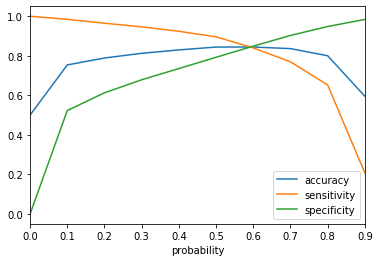

In [189]:
# Plotting accuracy, sensitivity and specificity for different probabilities.
cutoff_df.plot('probability', ['accuracy','sensitivity','specificity'])
plt.show()

##### Analysis of the above curve
Accuracy - Becomes stable around 0.6

Sensitivity - Decreases with the increased probablity.

Specificity - Increases with the increasing probablity.

`At point 0.6` where the three parameters cut each other, we can see that there is a balance bethween sensitivity and specificity with a good accuracy.

Here we are intended to acheive better sensitivity than accuracy and specificity. Though as per the above curve, we should take 0.6 as the optimum probability cutoff, we are taking ***0.5*** for acheiving higher sensitivity, which is our main goal.

In [190]:
# Creating a column with name "predicted", which is the predicted value for 0.5 cutoff 
y_train_pred_final['predicted'] = y_train_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

,churn,churn_prob,CustID,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,predicted
0,0,2.687411e-01,0,1,1,1,0,0,0,0,0,0,0,0
1,0,7.047483e-02,1,1,0,0,0,0,0,0,0,0,0,0
2,0,8.024370e-02,2,1,0,0,0,0,0,0,0,0,0,0
3,0,3.439222e-03,3,1,0,0,0,0,0,0,0,0,0,0
4,0,5.253815e-19,4,1,0,0,0,0,0,0,0,0,0,0


##### Metrics

In [191]:
# Confusion metrics
confusion = metrics.confusion_matrix(y_train_pred_final['churn'], y_train_pred_final['predicted'])
print(confusion)

[[16978  4447]
 [ 2232 19193]]


In [192]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [193]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_train_pred_final['churn'], y_train_pred_final['predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.8441306884480747
Sensitivity:- 0.8958226371061844
Specificity:- 0.792438739789965


We have got good accuracy, sensitivity and specificity on the train set prediction.

##### Plotting the ROC Curve (Trade off between sensitivity & specificity)

In [194]:
# ROC Curve function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

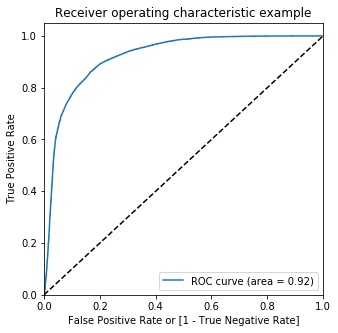

In [195]:
draw_roc(y_train_pred_final['churn'], y_train_pred_final['churn_prob'])

We can see the area of the ROC curve is closer to 1, whic is the Gini of the model.

### Testing the model on the test set

In [196]:
# Taking a copy of the test set
X_test_log = X_test.copy()

In [198]:
# Taking only the columns, which are selected in the train set after removing insignificant and multicollinear variables
X_test_log = X_test_log[log_cols]

In [199]:
# Adding constant on the test set
X_test_sm = sm.add_constant(X_test_log)

##### Predictions on the test set with final model

In [200]:
# Predict on the test set
y_test_pred = log_no_pca_3.predict(X_test_sm)

In [201]:
y_test_pred.head()

5704     0.034015
64892    0.000578
39613    0.513564
93118    0.020480
81235    0.034115
dtype: float64

In [202]:
# Converting y_test_pred to a dataframe because y_test_pred is an array
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
5704,0.034015
64892,0.000578
39613,0.513564
93118,0.020480
81235,0.034115


In [203]:
# Convetting y_test to a dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn
5704,0
64892,0
39613,0
93118,0
81235,0


In [204]:
# Putting index to Customer ID 
y_test_df['CustID'] = y_test_df.index

In [205]:
# Removing index form the both dataframes for merging them side by side
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [206]:
# Appending y_pred_1 and y_test_df
y_test_pred_final = pd.concat([y_test_df, y_pred_1], axis=1)

In [207]:
y_test_pred_final.head()

,churn,CustID,0
0,0,5704,0.034015
1,0,64892,0.000578
2,0,39613,0.513564
3,0,93118,0.020480
4,0,81235,0.034115


In [208]:
# Renaming the '0' column as churn probablity
y_test_pred_final = y_test_pred_final.rename(columns={0:'churn_prob'})

In [209]:
# Rearranging the columns
y_test_pred_final = y_test_pred_final.reindex_axis(['CustID','churn','churn_prob'], axis=1)

In [210]:
y_test_pred_final.head()

,CustID,churn,churn_prob
0,5704,0,0.034015
1,64892,0,0.000578
2,39613,0,0.513564
3,93118,0,0.020480
4,81235,0,0.034115


In [211]:
# In the test set using probablity cutoff 0.5, what we got in the train set 
y_test_pred_final['test_predicted'] = y_test_pred_final['churn_prob'].map(lambda x: 1 if x > 0.5 else 0)

In [212]:
y_test_pred_final.head()

,CustID,churn,churn_prob,test_predicted
0,5704,0,0.034015,0
1,64892,0,0.000578,0
2,39613,0,0.513564,1
3,93118,0,0.020480,0
4,81235,0,0.034115,0


##### Metrics

In [214]:
# Confusion matrix
confusion = metrics.confusion_matrix(y_test_pred_final['churn'], y_test_pred_final['test_predicted'])
print(confusion)

[[4190 1158]
 [  34  159]]


In [215]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [216]:
# Accuracy
print("Accuracy:-",metrics.accuracy_score(y_test_pred_final['churn'], y_test_pred_final['test_predicted']))

# Sensitivity
print("Sensitivity:-",TP / float(TP+FN))

# Specificity
print("Specificity:-", TN / float(TN+FP))


Accuracy:- 0.7848763761053962
Sensitivity:- 0.8238341968911918
Specificity:- 0.7834704562453254


***Model summary***

- Train set
    - Accuracy = 0.84
    - Sensitivity = 0.81
    - Specificity = 0.83
- Test set
    - Accuracy = 0.78
    - Sensitivity = 0.82
    - Specificity = 0.78
    
Overall, the model is performing well in the test set, what it had learnt from the train set.

#### Final conclusion with no PCA

We can see that the logistic model with no PCA has good sensitivity and accuracy, which are comparable to the models with PCA. So, we can go for the more simplistic model such as logistic regression with PCA.

## Business recomendation

Below are few 'top variables' selected in the logistic regression model.

| Variables   | Coefficients |
|---------------------|--------------|
|loc_ic_mou_8|-3.3287|
|og_others_7|-2.4711|
|ic_others_8|-1.5131|
|isd_og_mou_8|-1.3811|
|decrease_vbc_action|-1.3293|
|monthly_3g_8|-1.0943|
|std_ic_t2f_mou_8|-0.9503|
|monthly_2g_8|-0.9279|
|loc_ic_t2f_mou_8|-0.7102|
|roam_og_mou_8|0.7135|

We can see most of the top variables have negative coefficients. That means, the variables are inversely correlated with the churn probablity.

E.g.:- 

If the local incoming minutes of usage (loc_ic_mou_8) is lesser in the month of August than any other month, then there is a higher chance that the customer is likely to churn.

***Recomendations***

1. Target customers, whose minutes of usage of the incoming local calls and outgoing ISD calls are less in the action phase (mostly in the month of August).
2. Target customers, whose outgoing others charge in July and incoming others on August are less.
3. Customers having value based cost in the action phase increased are more likely to churn than the other customers. Hence, these customers may be a good target to provide offer.
4. Cutomers, whose monthly 3G recharge in August is more, are likely to be churned. 
5. Customers having decreasing STD incoming minutes of usage for operators T to fixed lines of T for the month of August are more likely to churn.
6. Cutomers decreasing monthly 2g usage for August are most probable to churn.
7. Customers having decreasing incoming minutes of usage for operators T to fixed lines of T for August are more likely to churn.
8. roam_og_mou_8 variables have positive coefficients (0.7135). That means for the customers, whose roaming outgoing minutes of usage is increasing are more likely to churn.


#### Plots of important predictors for churn and non churn customers

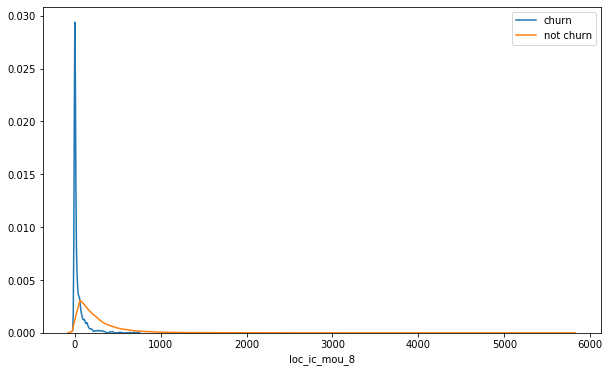

In [217]:
# Plotting loc_ic_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['loc_ic_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['loc_ic_mou_8'],label='not churn',hist=False)
plt.show()

We can see that for the churn customers the minutes of usage for the month of August is mostly populated on the lower side than the non churn customers.

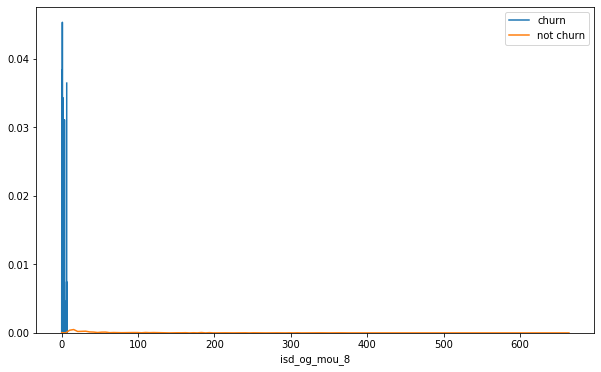

In [218]:
# Plotting isd_og_mou_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['isd_og_mou_8'],label='churn',hist=False)
sns.distplot(data_non_churn['isd_og_mou_8'],label='not churn',hist=False)
plt.show()

We can see that the ISD outgoing minutes of usage for the month of August for churn customers is densed approximately to zero. On the onther hand for the non churn customers it is little more than the churn customers.

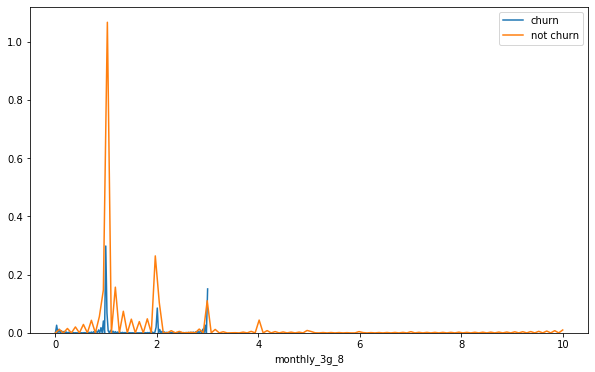

In [219]:
# Plotting monthly_3g_8 predictor for churn and not churn customers
fig = plt.figure(figsize=(10,6))
sns.distplot(data_churn['monthly_3g_8'],label='churn',hist=False)
sns.distplot(data_non_churn['monthly_3g_8'],label='not churn',hist=False)
plt.show()

The number of mothly 3g data for August for the churn customers are very much populated aroud 1, whereas of non churn customers it spreaded accross various numbers.

Similarly we can plot each variables, which have higher coefficients, churn distribution.